# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Вам нужно научиться определять рыночную стоимость объектов недвижимости. Для этого проведите исследовательский анализ данных и установите параметры, влияющие на цену объектов. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность.

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта и других объектов — эти данные автоматически получены из геосервисов. Количество парков и водоёмов также заполняется без участия пользователя.

### Шаг 1. Откройте файл с данными и изучите общую информацию

In [6]:
import pandas as pd
import copy

import matplotlib.pyplot as plt 
import seaborn as sns
import missingno as msno
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [2]:

data = pd.read_csv('https://code.s3.yandex.net/datasets/real_estate_data.csv', sep='\t')

In [3]:
# получение первых 10 строк таблицы data
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [4]:
# получение общей информации о данных в таблице data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

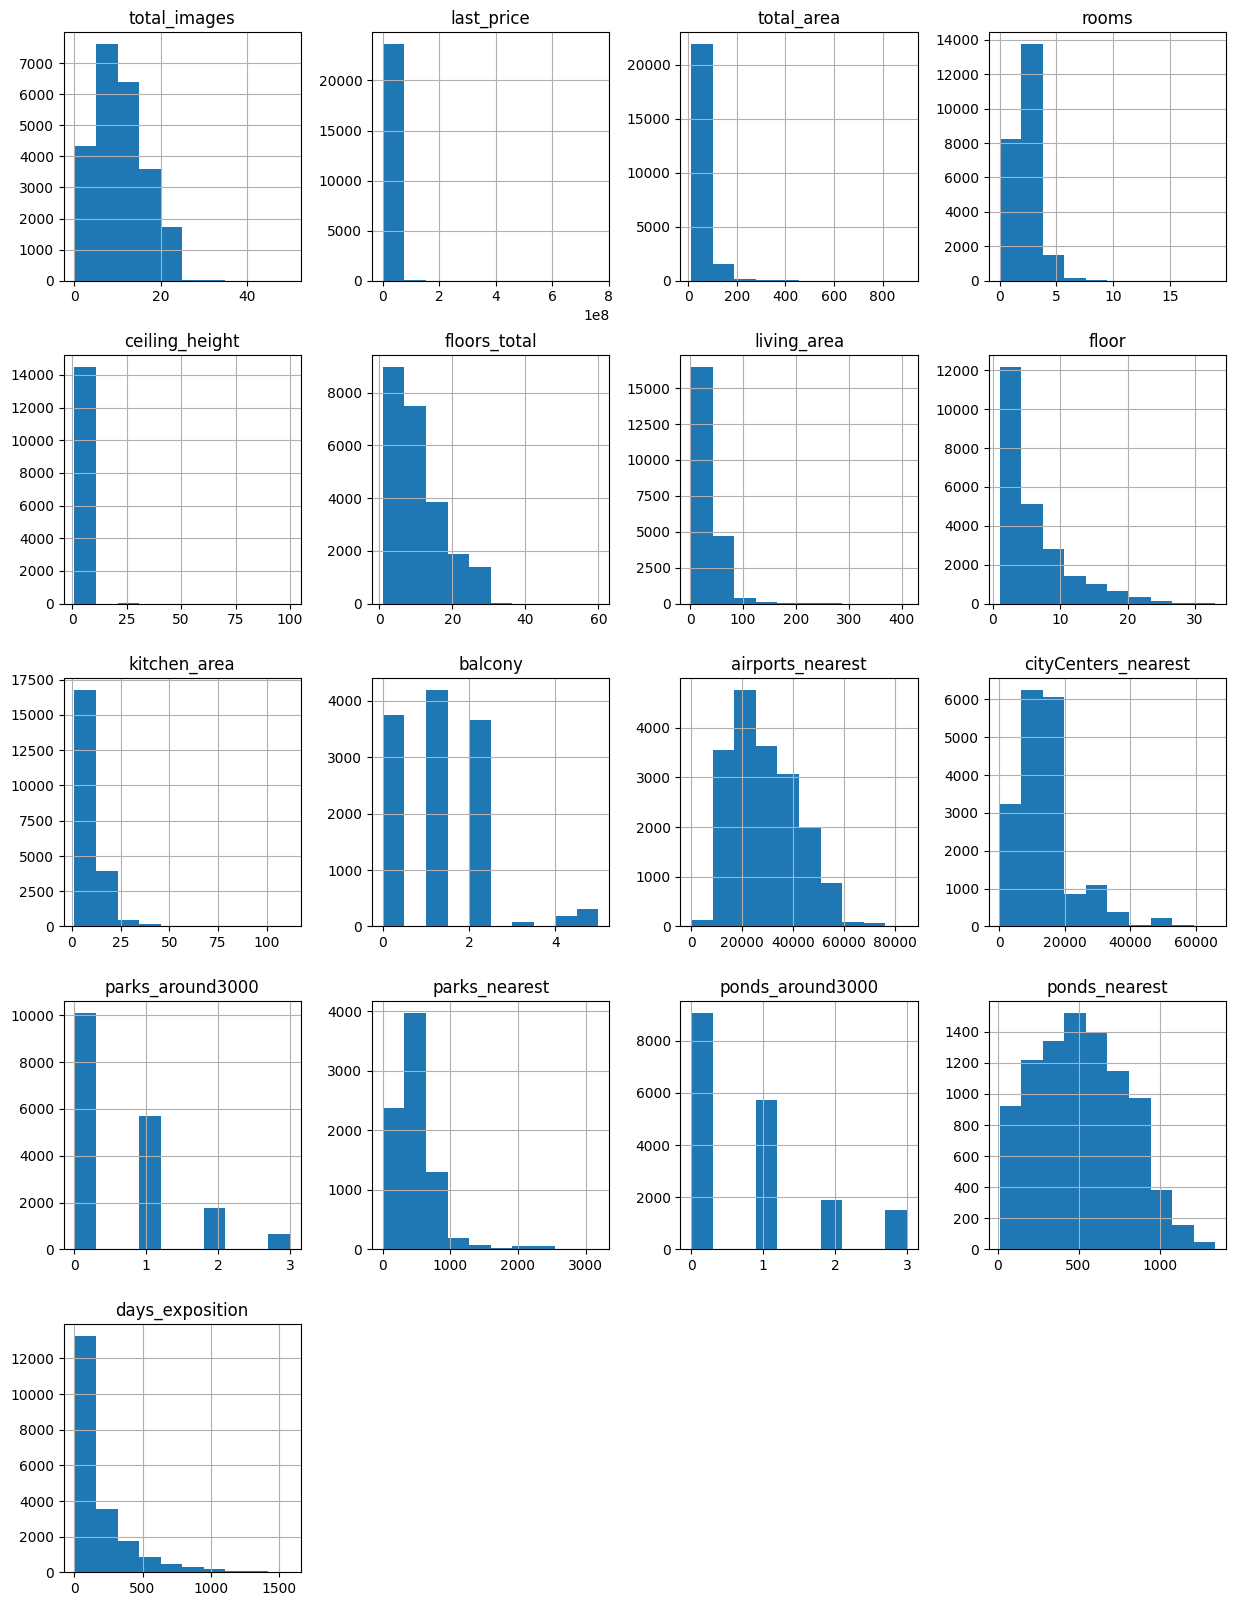

In [5]:
#Построение гистограмму для всех числовых столбцов таблицы на одном графике
data.hist(figsize=(15, 20))
plt.show()

Отобразим уникальные значения по каждому столбцу.

In [6]:
for column in data.columns:
    print(column)
    print(data[column].unique())
    print()

total_images
[20  7 10  0  2  6  5 18  9  1 16 11  8 12 13  3 15 17 14 19 32  4 35 39
 23 21 27 30 24 25 28 31 22 29 26 50 42 37]

last_price
[13000000.  3350000.  5196000. ...  6151120. 21400000. 11475000.]

total_area
[108.    40.4   56.   ...  66.86 133.81  76.75]

first_day_exposition
['2019-03-07T00:00:00' '2018-12-04T00:00:00' '2015-08-20T00:00:00' ...
 '2014-12-29T00:00:00' '2016-09-12T00:00:00' '2015-07-19T00:00:00']

rooms
[ 3  1  2  4  5  6  0  7 11  8 14 10 15  9 19 16 12]

ceiling_height
[  2.7     nan   3.03   2.5    2.67   2.56   3.05   2.75   2.6    2.9
   2.8    2.55   3.     2.65   3.2    2.61   3.25   3.45   2.77   2.85
   2.64   2.57   4.15   3.5    3.3    2.71   4.     2.47   2.73   2.84
   3.1    2.34   3.4    3.06   2.72   2.54   2.51   2.78   2.76  25.
   2.58   3.7    2.52   5.2    2.87   2.66   2.59   2.     2.45   3.6
   2.92   3.11   3.13   3.8    3.15   3.55   3.16   3.62   3.12   2.53
   2.74   2.96   2.46   5.3    5.     2.79   2.95   4.06   2.94   3.82
  

<b>Вывод</b>

Выделение типов переменных в data:

- Категориальные: locality_name.
- Количественные: total_images, last_price, total_area, first_day_exposition, rooms, ceiling_height, floors_total, living_area, floor, kitchen_area, balcony, airports_nearest, cityCenters_nearest, parks_around3000, parks_nearest, ponds_nearest, ponds_around3000, days_exposition.
- Логические: is_apartment, studio, open_plan.

Выявлены следующие аномалии:

Случайного типа:

1. Значения rooms 1 или 0 при указании квартиры как студии. Здесь можно ошибиться не зная четких правил по определению количество комнат в студии. Или продавец не указал количество комнат, т.к. определен тип квартиры студия.
2. Значения False в studio при количестве комнат = 0. Относится к пропуску значения комнат, никак не связанных со студией. Продавец не указал количество комнат.
3. Значения NaN в столбце kitchen_area. Возможная потеря данных. Легко восстановить имея данные об общей площади.
4. Значения NaN в столце balcony. Возможная потеря данных или неуказание количество балконов в виду их отсутсвия.
5. Значения NaN в столце parks_around3000 и ponds_around3000. Возможная потеря данных или неуказание количество парков или прудов в виду их отсутсвия.
6. Значения NaN в locality_name, cityCenters_nearest. days_exposition, ceiling_height, floors_total. Возможные потери данных.

Неслучайного типа:

1. Значение 0 в total_images. Возможно кто-то специально не хочет показывать квартиру ввиду ее отсутсвия или желания показать квартиру только при встрече.
2. Значение времени 00:00:00 в first_day_exposition. Точное время отправки на сайт продажи не требуется, нужен только день.
3. Значения NaN в is_apartment. Около 21000 квартир не имеют статуса в этой категории. Возможно продавцы не указали, жилая квартира для постоянного проживания или апартаменты для временного в виду своего незнания.
4. Значения NaN в столце parks_nearest и ponds_nearest. Здесь можно было ориентироваться на количество пустых и 0 значений в столбце parks_around3000 и ponds_around3000 соответсвенно. Вывод сделан на примерной сумме пустых значений и 0.
5. Совпадение по количеству пропусков в parks_around3000 и ponds_around3000. Значит продавцы не указали эти факторы как значимые в своей публикации.

### Шаг 2. Выполните предобработку данных

Начнем с размера квартиры по количеству комнат. Если количество комнат равно 0, то заменим это значение на 1.

In [7]:
data['rooms'] = data['rooms'].replace(0,1)

In [8]:
#количество пропущенных значений для каждого столбца
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

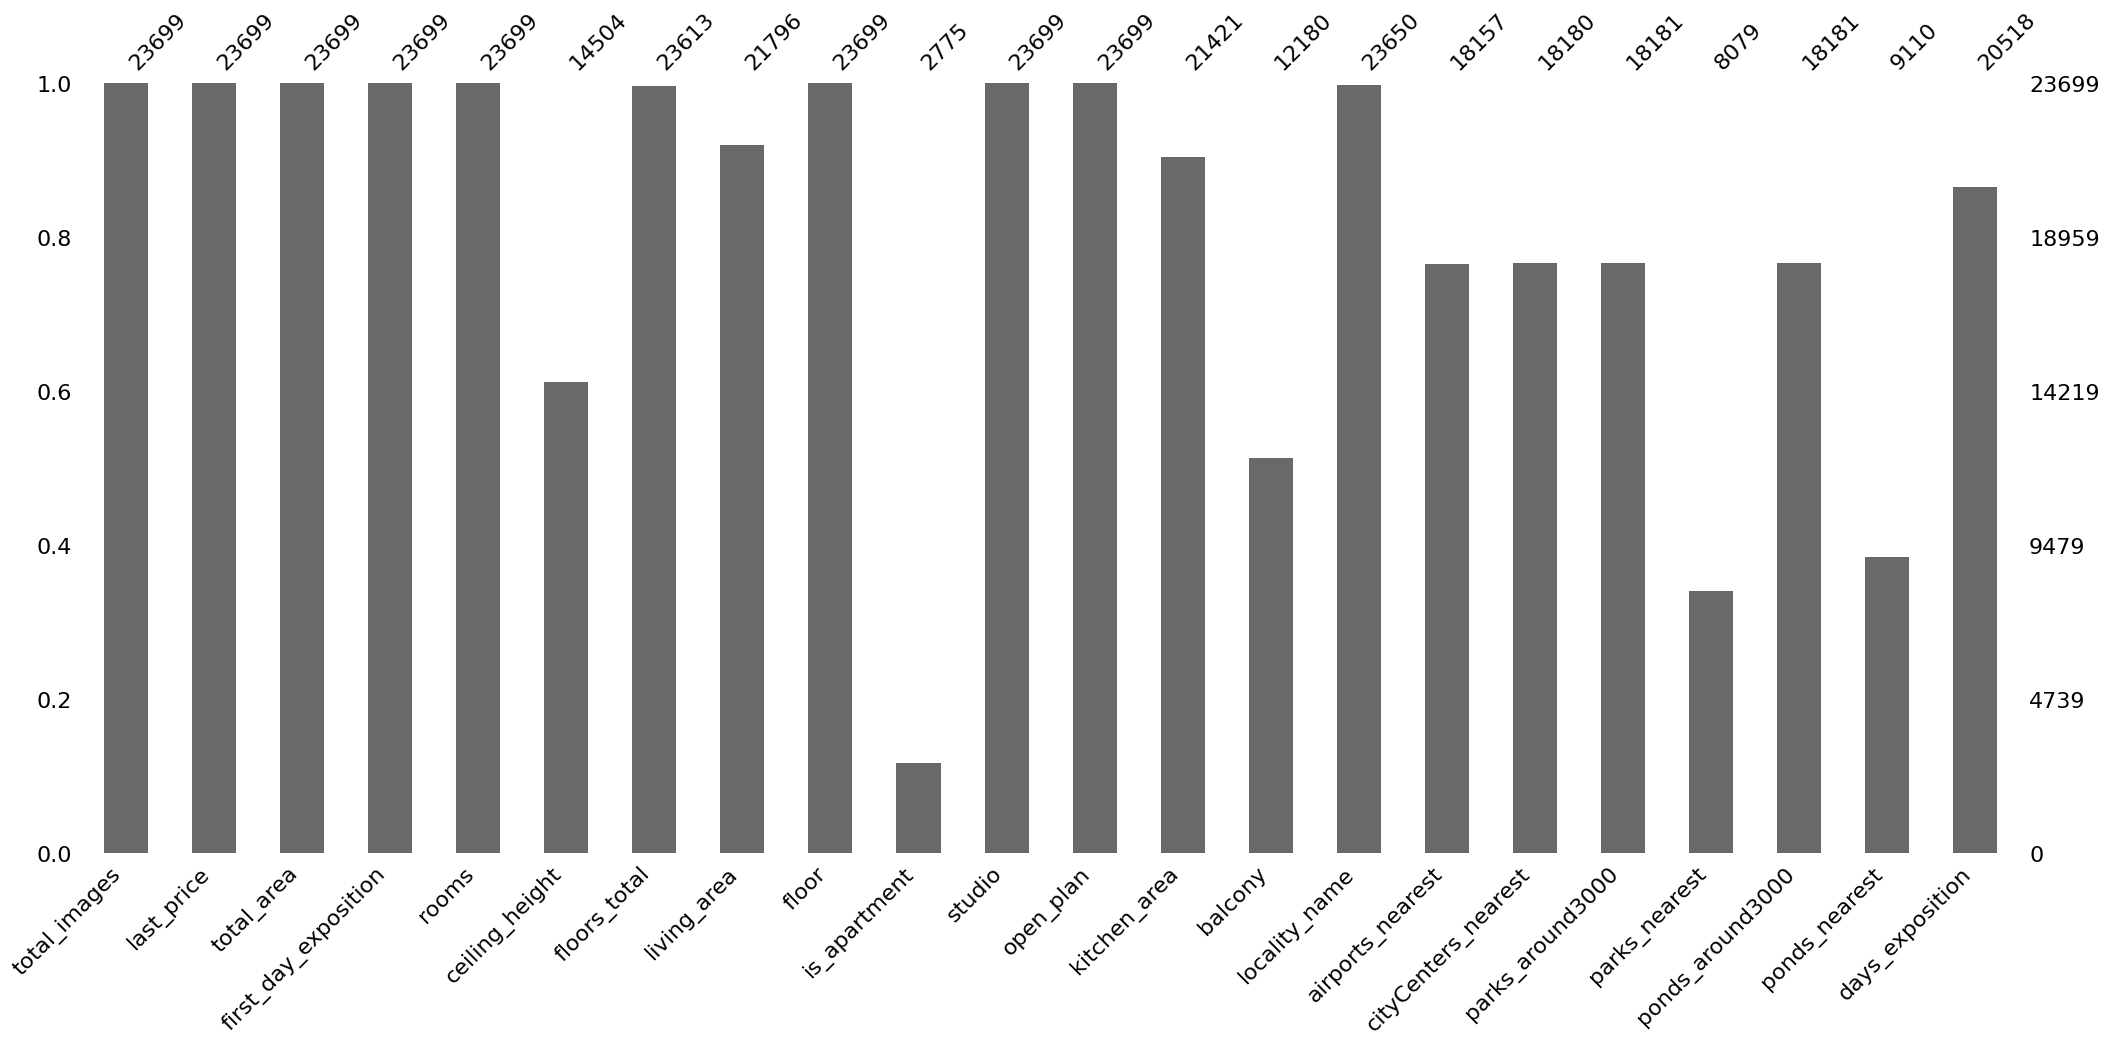

In [9]:
msno.bar(data)
plt.show()

*Столбцы с восстановлением пропуков*

- floors_total. Необходим для категоризации данных по расположению этажа в жилом доме.
- living_area. Ключевой фактор для создания соотношения к общей площади.
- kitchen_area. Ключевой фактор для создания соотношения к общей площади.
- cityCenters_nearest. Ключевой фактор для определения удаленности от центра Санкт-Петербурга.
- locality_name. Этот столбец имеет значения для гипотез. Но его можно восстановить, зная местоположение от центра.

*Столцбы, неимеющие значения для гипотез*
- is_apartment. Определение типа жилого помещения на постоянной основе с регистрацией, т.е. квартиры, и апартамента не имеет никакого значения для гипотез.
- balcony. Этот столбец не имеет значения для гипотез. Но его легко восстановить.
- parks_nearest и ponds_nearest. Эти столбцы не имеею значения для гипотез. Теоретически их можно восстановить из столбцов parks_around3000 и ponds_around3000.
- airports_nearest, parks_around3000 и ponds_around3000. Количество в около 5500 значений говорит или о системной ошибке, или создании такого количество предложений с пропусками в этих значениях. Можно ориентироваться в пропусках на местоположение в locality_name.

*Столбцы, воостановления значений которых невозможно*
- ceiling_height. Пропущенных значений слишком много для достоверного восстановления картины.
- locality_name и cityCenters_nearest, значения которых NaN. Эти предложения не подходят для некоторых гипотез. Соотвественно их можно удалить
- days_exposition. Важный для нас столбец для определения успешности продаж, проставляет значение только по снятию продаж

Пропуски в floors_total заменим, изучив этаж квартиры и популярные значения всех этажей в доме по данным.

In [10]:
print(data[data['floors_total'].isna()]['floor'].value_counts())
data['floors_total'].value_counts()

floor
4     10
6      9
8      8
12     6
9      5
21     4
5      4
7      4
3      4
19     3
11     3
13     3
1      3
18     3
15     3
10     3
24     2
2      2
20     2
14     2
22     1
17     1
23     1
Name: count, dtype: int64


floors_total
5.0     5788
9.0     3761
16.0    1376
12.0    1362
4.0     1200
10.0    1174
25.0    1075
6.0      914
17.0     833
3.0      668
7.0      592
14.0     553
18.0     505
24.0     469
8.0      390
2.0      383
15.0     365
23.0     352
19.0     339
22.0     286
20.0     271
13.0     229
11.0     203
27.0     164
21.0     158
26.0     124
1.0       25
35.0      24
28.0      21
36.0       3
34.0       1
60.0       1
29.0       1
33.0       1
52.0       1
37.0       1
Name: count, dtype: int64

Дома с указанным этажом квартиры и отсутвием максимального этажа в доме скорей всего подтверждает, что продавец по-умолчанию указал последний этаж в доме, раз не повторил эту информацию. Сводный анализ по количеству этажей по домам говорит о том, что все строки с пропусками встречаются в выборке по максимальной этажности здания.

Соотвественно будем считать, что указанный этаж являеятеся последним этажом в доме.

Проверим нереальные значения для столбца ceiling_height. Выявим стандартное требования к высоте потолков.

 Минимальная высота потолков должна быть 2.5 м.

In [11]:
bad_ceiling_height = data[data['ceiling_height'] < 2.5]
bad_index = bad_ceiling_height.index
print(bad_index)
data.drop(bad_index, inplace=True)

Index([  193,   227,   552,   632,   987,  1078,  1322,  1582,  1677,  2236,
        2572,  3633,  3703,  4212,  5498,  5542,  5712,  5735,  5850,  5858,
        5918,  5941,  6066,  6178,  7270,  7644,  7791,  8298,  9192, 10100,
       10160, 11125, 11352, 11485, 11868, 12069, 12755, 13271, 13462, 14345,
       14463, 14491, 15444, 15453, 15939, 16237, 16446, 16884, 16934, 17408,
       17601, 17762, 17794, 18900, 19098, 19329, 19907, 20085, 20520, 20564,
       21180, 21349, 21401, 21521, 22372, 22411, 22462, 22584, 22590, 22960,
       23121, 23496, 23498],
      dtype='int64')


In [12]:
data['floors_total'] = data['floors_total'].fillna(0)

def fill_floors_total(column):
    if column[6] == 0:
        column[6] = column[8]
    return column

data = data.apply(fill_floors_total, axis=1)

data['floors_total'].isna().sum()

C:\Users\User\AppData\Local\Temp\ipykernel_1872\70315836.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if column[6] == 0:
C:\Users\User\AppData\Local\Temp\ipykernel_1872\70315836.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  column[6] = column[8]
C:\Users\User\AppData\Local\Temp\ipykernel_1872\70315836.py:5: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  column[6] = column[8]


0

Пропуски в living_area заполним, взяв за основу среднее соотношение жилой площади к общей.

In [13]:
living_area_ratio_mean = (data['living_area'] / data['total_area']).mean()
living_area_ratio_median = (data['living_area'] / data['total_area']).median()
print(living_area_ratio_mean, living_area_ratio_median, living_area_ratio_mean/living_area_ratio_median)

0.5646249464850973 0.5676855895196506 0.9946085595775945


Для сравнения полученных результатов из отношения значений в строке, возмем результаты, примененные к выборке в целом.

In [14]:
living_area_mean = data['living_area'].mean()
living_area_median = data['living_area'].median()
print(living_area_mean, living_area_median, living_area_mean/living_area_median)
total_area_mean = data['total_area'].mean()
total_area_median = data['total_area'].median()
print(total_area_mean, total_area_median, total_area_mean/total_area_median)
living_area_ratio_mean_series = living_area_mean / total_area_mean
living_area_ratio_median_series = living_area_median / total_area_median
print(living_area_ratio_mean_series, living_area_ratio_median_series, living_area_ratio_mean_series/ living_area_ratio_median_series)

34.47136322472272 30.0 1.1490454408240907
60.38611318039448 52.0 1.1612714073152786
0.5708491805350128 0.5769230769230769 0.9894719129273556


Применим процент жилой площади из переменной living_area_ratio_mean. Заполним пустоты основывась на знании total_area по формуле: living_area = total_area * living_area_ratio_mean

In [15]:
data['living_area'] = data['living_area'].fillna(0)

def fill_living_area(column):
    if column[7] == 0:
        column[7] = float(format(column[2] * living_area_ratio_mean, '.2f'))
    return column

data = data.apply(fill_living_area, axis=1)

data['living_area'].isna().sum()

C:\Users\User\AppData\Local\Temp\ipykernel_1872\4052740338.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if column[7] == 0:
C:\Users\User\AppData\Local\Temp\ipykernel_1872\4052740338.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  column[7] = float(format(column[2] * living_area_ratio_mean, '.2f'))
C:\Users\User\AppData\Local\Temp\ipykernel_1872\4052740338.py:5: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  column[7] 

0

Пропуски в is_apartment заменим на False, так как отсуствие по этому пункту говорит нам, что перед нами обычная квартира.

In [16]:

data['is_apartment'] = data['is_apartment'].fillna(False)

Для пропусков в столбце kitchen_area проанализируем соотношение

In [17]:
kitchen_area_ratio_mean = (data['kitchen_area'] / data['total_area']).mean()
kitchen_area_ratio_median = (data['kitchen_area'] / data['total_area']).median()
print(kitchen_area_ratio_mean, kitchen_area_ratio_median, kitchen_area_ratio_mean/kitchen_area_ratio_median)

0.18742111489014834 0.1724137931034483 1.0870424663628604


Для заполнения будем использовать среднее соотношение. Если произведение общей площади на это соотношение даст значение меньше 5 кв.м. то будет использовать константу в 5 кв.м(минимальный размер кухни).

In [18]:
data['kitchen_area'] = data['kitchen_area'].fillna(0)

def fill_kitchen_area(column):
    if column[12] == 0:
        normal_fill_kitchen = float(format(column[2] * kitchen_area_ratio_mean, '.2f'))
        if column[4] == 1:
            if normal_fill_kitchen >= 5:
                column[12] = normal_fill_kitchen
            else:
                column[12] = 5
        elif column[4] > 1:
            if normal_fill_kitchen >= 6:
                column[12] = normal_fill_kitchen
            else:
                column[12] = 6
    return column

data = data.apply(fill_kitchen_area, axis=1)

data['kitchen_area'].isna().sum()

C:\Users\User\AppData\Local\Temp\ipykernel_1872\2701719832.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if column[12] == 0:
C:\Users\User\AppData\Local\Temp\ipykernel_1872\2701719832.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  normal_fill_kitchen = float(format(column[2] * kitchen_area_ratio_mean, '.2f'))
C:\Users\User\AppData\Local\Temp\ipykernel_1872\2701719832.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if 

0

Для пропусков в столбце balcony установим значение 0.

In [19]:
data['balcony'] = data['balcony'].fillna(0)


Посмотрим, какие значения пропущены в locality_name.

In [20]:
nan_locality_name = data[data['locality_name'].isna()]
nan_locality_name.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
1097,3,8600000.0,81.7,2016-04-15T00:00:00,3,3.55,5.0,50.8,2,False,...,8.8,0.0,NaN,23478.0,4258.0,0.0,NaN,0.0,NaN,147.0
2033,6,5398000.0,80.0,2017-05-30T00:00:00,3,NaN,4.0,42.6,2,False,...,18.6,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34.0
2603,20,3351765.0,42.7,2015-09-20T00:00:00,1,NaN,24.0,15.6,3,False,...,10.7,0.0,NaN,22041.0,17369.0,0.0,NaN,1.0,374.0,276.0
2632,2,5130593.0,62.4,2015-10-11T00:00:00,2,NaN,24.0,33.1,21,False,...,8.2,0.0,NaN,22041.0,17369.0,0.0,NaN,1.0,374.0,256.0
3574,10,4200000.0,46.5,2016-05-28T00:00:00,2,NaN,5.0,30.8,5,False,...,6.5,0.0,NaN,27419.0,8127.0,0.0,NaN,1.0,603.0,45.0


Невозможно восстановить данные, если в cityCenters_nearest стоит NaN. Удалим эти значения.

In [21]:
bad_locality_name = nan_locality_name[nan_locality_name['cityCenters_nearest'].isna()]
bad_locality_name.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
2033,6,5398000.0,80.0,2017-05-30T00:00:00,3,NaN,4.0,42.60,2,False,...,18.60,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34.0
14342,3,3611000.0,53.5,2017-04-27T00:00:00,1,NaN,4.0,25.80,3,False,...,10.03,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,92.0
17535,2,5985000.0,79.8,2018-07-30T00:00:00,3,NaN,9.0,45.06,2,False,...,14.96,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,213.0
20382,8,1750000.0,72.9,2018-10-27T00:00:00,3,NaN,5.0,47.30,2,False,...,8.30,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20590,7,3380000.0,56.0,2017-11-06T00:00:00,2,2.7,4.0,29.00,3,False,...,10.00,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,78.0


In [22]:
bad_index = bad_locality_name.index

data.drop(bad_index, inplace=True)


Проведем поиск расстояния по указанному locality_name от центра Санкт-Петербурга. Начнем с категоризации местоположения.

In [23]:
print(data['locality_name'].value_counts())
data['locality_name'].unique()

locality_name
Санкт-Петербург                   15688
посёлок Мурино                      522
посёлок Шушары                      440
Всеволожск                          397
Пушкин                              366
                                  ...  
поселок Гладкое                       1
посёлок городского типа Рябово        1
поселок Цвылёво                       1
поселок городского типа Рябово        1
посёлок Дзержинского                  1
Name: count, Length: 363, dtype: int64


array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

В названиях имеются дубликаты к примеру поселок Рябово и поселок городского типа Рябово, поселок Тельмана и посёлок Тельмана» — это обозначения одних и тех же населённых пунктов. Проведем работу над приведением к одному виду столбца locality_name.

In [24]:

flats_sales_data_copy = copy.deepcopy(data)

bad_locality_name = flats_sales_data_copy[flats_sales_data_copy['locality_name'].isna()]

bad_index = bad_locality_name.index
print(bad_index)

flats_sales_data_copy.drop(bad_index, inplace=True)

def make_short_name(row):
    split_name = row.split()
    new_name = []
    for word in split_name:
        if word[0].isupper():
            new_name.append(word)
    new_name = ' '.join(word for word in new_name)
    return new_name

    
flats_sales_data_copy['short_locality_name'] = flats_sales_data_copy['locality_name'].apply(make_short_name)

short_locality_name_keys = flats_sales_data_copy['short_locality_name'].unique()
short_locality_name_keys

Index([ 1097,  2603,  2632,  3574,  4151,  4189,  4670,  5343,  5707,  6765,
        7114,  7330,  7600,  8568,  8986,  9821, 10122, 11248, 12879, 12936,
       13223, 13690, 14273, 15686, 15866, 16499, 16561, 16610, 17764, 18526,
       18917, 19045, 19972, 20057, 20654, 21119, 21276, 21333, 22474, 22933,
       23214],
      dtype='int64')


array(['Санкт-Петербург', 'Шушары', 'Янино-1', 'Парголово', 'Мурино',
       'Ломоносов', 'Сертолово', 'Петергоф', 'Пушкин', 'Кудрово',
       'Коммунар', 'Колпино', 'Красный Бор', 'Гатчина', 'Фёдоровское',
       'Выборг', 'Кронштадт', 'Кировск', 'Новое Девяткино',
       'Металлострой', 'Лебяжье', 'Сиверский', 'Молодцово',
       'Кузьмоловский', 'Новая Ропша', 'Павловск', 'Пикколово',
       'Всеволожск', 'Волхов', 'Кингисепп', 'Приозерск', 'Сестрорецк',
       'Куттузи', 'Аннино', 'Ефимовский', 'Плодовое', 'Заклинье',
       'Торковичи', 'Первомайское', 'Красное Село', 'Понтонный',
       'Сясьстрой', 'Старая', 'Лесколово', 'Сланцы', 'Путилово',
       'Ивангород', 'Шлиссельбург', 'Никольское', 'Зеленогорск',
       'Сосновый Бор', 'Новый Свет', 'Оржицы', 'Кальтино', 'Романовка',
       'Бугры', 'Рощино', 'Кириши', 'Луга', 'Волосово', 'Отрадное',
       'Павлово', 'Оредеж', 'Копорье', 'Молодёжное', 'Тихвин', 'Победа',
       'Нурма', 'Синявино', 'Тосно', 'Стрельна', 'Бокситогорск',

Мы создали список имен для словаря, теперь соотнесем и найдем среднее растояние от названия местности с центром города. Это поможет на заполнить пропуски в locality_name и cityCenters_nearest.

In [25]:
flats_sales_data_copy['short_locality_name'].unique()

array(['Санкт-Петербург', 'Шушары', 'Янино-1', 'Парголово', 'Мурино',
       'Ломоносов', 'Сертолово', 'Петергоф', 'Пушкин', 'Кудрово',
       'Коммунар', 'Колпино', 'Красный Бор', 'Гатчина', 'Фёдоровское',
       'Выборг', 'Кронштадт', 'Кировск', 'Новое Девяткино',
       'Металлострой', 'Лебяжье', 'Сиверский', 'Молодцово',
       'Кузьмоловский', 'Новая Ропша', 'Павловск', 'Пикколово',
       'Всеволожск', 'Волхов', 'Кингисепп', 'Приозерск', 'Сестрорецк',
       'Куттузи', 'Аннино', 'Ефимовский', 'Плодовое', 'Заклинье',
       'Торковичи', 'Первомайское', 'Красное Село', 'Понтонный',
       'Сясьстрой', 'Старая', 'Лесколово', 'Сланцы', 'Путилово',
       'Ивангород', 'Шлиссельбург', 'Никольское', 'Зеленогорск',
       'Сосновый Бор', 'Новый Свет', 'Оржицы', 'Кальтино', 'Романовка',
       'Бугры', 'Рощино', 'Кириши', 'Луга', 'Волосово', 'Отрадное',
       'Павлово', 'Оредеж', 'Копорье', 'Молодёжное', 'Тихвин', 'Победа',
       'Нурма', 'Синявино', 'Тосно', 'Стрельна', 'Бокситогорск',

In [26]:
locality_and_cityCenter_dict = {}

bad_cityCenters_nearest = flats_sales_data_copy[flats_sales_data_copy['cityCenters_nearest'].isna()]

bad_index = bad_cityCenters_nearest.index
print(bad_index)

flats_sales_data_copy.drop(bad_index, inplace=True)
print(flats_sales_data_copy['short_locality_name'].unique())

def make_locality_and_cityCenter_dict(data_frame):
    for name in short_locality_name_keys:
        mean = data_frame[data_frame['short_locality_name'] == name]['cityCenters_nearest'].mean()
        locality_and_cityCenter_dict[name] = mean
        
make_locality_and_cityCenter_dict(flats_sales_data_copy)
locality_and_cityCenter_dict

Index([    5,     8,    12,    22,    30,    37,    38,    47,    60,    62,
       ...
       23666, 23670, 23677, 23679, 23682, 23683, 23692, 23695, 23696, 23698],
      dtype='int64', length=5480)
['Санкт-Петербург' 'Шушары' 'Парголово' 'Ломоносов' 'Петергоф' 'Пушкин'
 'Колпино' 'Кронштадт' 'Металлострой' 'Павловск' 'Сестрорецк'
 'Красное Село' 'Понтонный' 'Зеленогорск' 'Молодёжное' 'Стрельна'
 'Александровская' 'Песочный' 'Петро-Славянка' 'Репино' 'Сапёрный'
 'Щеглово' 'Лисий Нос' 'Левашово' 'Белоостров' 'Мурино' 'Усть-Ижора']


{'Санкт-Петербург': 11600.588852626865,
 'Шушары': 24243.3876146789,
 'Янино-1': nan,
 'Парголово': 19920.78527607362,
 'Мурино': 21888.0,
 'Ломоносов': 50739.969696969696,
 'Сертолово': nan,
 'Петергоф': 35468.92537313433,
 'Пушкин': 28761.74794520548,
 'Кудрово': nan,
 'Коммунар': nan,
 'Колпино': 32114.52380952381,
 'Красный Бор': nan,
 'Гатчина': nan,
 'Фёдоровское': nan,
 'Выборг': nan,
 'Кронштадт': 49219.62765957447,
 'Кировск': nan,
 'Новое Девяткино': nan,
 'Металлострой': 27568.21875,
 'Лебяжье': nan,
 'Сиверский': nan,
 'Молодцово': nan,
 'Кузьмоловский': nan,
 'Новая Ропша': nan,
 'Павловск': 33206.92105263158,
 'Пикколово': nan,
 'Всеволожск': nan,
 'Волхов': nan,
 'Кингисепп': nan,
 'Приозерск': nan,
 'Сестрорецк': 34624.48087431694,
 'Куттузи': nan,
 'Аннино': nan,
 'Ефимовский': nan,
 'Плодовое': nan,
 'Заклинье': nan,
 'Торковичи': nan,
 'Первомайское': nan,
 'Красное Село': 30030.994285714285,
 'Понтонный': 32293.45,
 'Сясьстрой': nan,
 'Старая': nan,
 'Лесколово': na

Из проведенной обработки данных видно, что не все объявления имеют расстояния и многие деревни, поселки и города не имеют расстояния от центра Санкт-Петербурга. Для гипотезы по расстоянию от центра важны только квартиры в Санкт-Петербурге. Для этого проверим сколько сейчас пропусков в расстоянии с указанным городом Санкт-Петербург.

In [27]:
locality_and_cityCenter_dict = {}
short_locality_name_keys = flats_sales_data_copy['short_locality_name'].unique()
make_locality_and_cityCenter_dict(flats_sales_data_copy)
print(locality_and_cityCenter_dict)

SP_flats_sales_data = data.query('locality_name == "Санкт-Петербург" and cityCenters_nearest.isna()')
SP_flats_sales_data['cityCenters_nearest'].isna().value_counts()

{'Санкт-Петербург': 11600.588852626865, 'Шушары': 24243.3876146789, 'Парголово': 19920.78527607362, 'Ломоносов': 50739.969696969696, 'Петергоф': 35468.92537313433, 'Пушкин': 28761.74794520548, 'Колпино': 32114.52380952381, 'Кронштадт': 49219.62765957447, 'Металлострой': 27568.21875, 'Павловск': 33206.92105263158, 'Сестрорецк': 34624.48087431694, 'Красное Село': 30030.994285714285, 'Понтонный': 32293.45, 'Зеленогорск': 54617.583333333336, 'Молодёжное': 65529.2, 'Стрельна': 23376.113636363636, 'Александровская': 27468.0, 'Песочный': 26475.25, 'Петро-Славянка': 27165.0, 'Репино': 43392.25, 'Сапёрный': 35854.666666666664, 'Щеглово': 34085.0, 'Лисий Нос': 27613.333333333332, 'Левашово': 25727.0, 'Белоостров': 38868.0, 'Мурино': 21888.0, 'Усть-Ижора': 28222.5}


cityCenters_nearest
True    61
Name: count, dtype: int64

Только для этих 61 значений мы восстановим среднее расстояние от центра города.

Для объявлений, чье расстояние от центра менее 15 км, заменим пропуск на Санкт-Петебург. Все остальные пропуски зададим расположение "За пределами города".

In [28]:
data['locality_name'] = data['locality_name'].fillna('empty')
print(data[data['locality_name'] == 'empty']['cityCenters_nearest'].value_counts())

def fill_locality_name(row):
    if row[14] == 'empty':
        if row[16] < 15000:
            row[14] = 'Санкт-Петебург'
        else:
            row[14] = 'За пределами города'
    return row

data = data.apply(fill_locality_name, axis=1)
data.info()

cityCenters_nearest
17369.0    8
4258.0     2
8943.0     2
12332.0    2
23659.0    1
4805.0     1
41294.0    1
31897.0    1
4604.0     1
3312.0     1
8429.0     1
10976.0    1
1322.0     1
8619.0     1
9497.0     1
9633.0     1
4069.0     1
4383.0     1
4474.0     1
3801.0     1
31813.0    1
4065.0     1
4627.0     1
8582.0     1
16788.0    1
9538.0     1
5382.0     1
3039.0     1
3902.0     1
8127.0     1
1780.0     1
Name: count, dtype: int64


C:\Users\User\AppData\Local\Temp\ipykernel_1872\1280830853.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if row[14] == 'empty':
C:\Users\User\AppData\Local\Temp\ipykernel_1872\1280830853.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if row[16] < 15000:
C:\Users\User\AppData\Local\Temp\ipykernel_1872\1280830853.py:7: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  row[14] = 'Санкт-Петебург'
C:\Users\User\AppData\Local\

<class 'pandas.core.frame.DataFrame'>
Index: 23618 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23618 non-null  int64  
 1   last_price            23618 non-null  float64
 2   total_area            23618 non-null  float64
 3   first_day_exposition  23618 non-null  object 
 4   rooms                 23618 non-null  int64  
 5   ceiling_height        14429 non-null  float64
 6   floors_total          23618 non-null  float64
 7   living_area           23618 non-null  float64
 8   floor                 23618 non-null  int64  
 9   is_apartment          23618 non-null  bool   
 10  studio                23618 non-null  bool   
 11  open_plan             23618 non-null  bool   
 12  kitchen_area          23618 non-null  float64
 13  balcony               23618 non-null  float64
 14  locality_name         23618 non-null  object 
 15  airports_nearest      18

parks_around3000 и ponds_around3000 заполним значениями 0.

In [29]:
data['parks_around3000'] = data['parks_around3000'].fillna(0)
data['ponds_around3000'] = data['ponds_around3000'].fillna(0)


Заполнение столцов airports_nearest, cityCenters_nearest и ponds_nearest не требуется из условий гипотез.

Количество пропусков в ceiling_height очень большое и корректировка этих значений может привести к неправильному толкованию.

<b>Приведение типа данных</b><br>

*Следующие столбцы будут приведены в целочисленный тип(int):*

- last_price. Обычно никто не ставит цену на квартиру в рублях с указанием копеек.
- floors_total. В домах не может быть половина этажа. Только целые.
- balcony. Исходя из значений в столце, количество балконов должно быть целым.
- airports_nearest, cityCenters_nearest, parks_nearest и ponds_nearest. Здесь расстояния указаны в метрах.
- parks_around3000 и ponds_around3000. Как и в случае с балконами, здесь указывается целое число.<br>

Значения в airports_nearest, cityCenters_nearest, parks_nearest, ponds_nearest и days_exposition не могут быть изменены на int из-за значений NaN.

In [30]:
data['last_price'] = data['last_price'].astype('int32')
data['floors_total'] = data['floors_total'].astype('int32')
data['balcony'] = data['balcony'].astype('int32')
data['airports_nearest'] = pd.to_numeric(data['airports_nearest'], downcast='integer')
data['cityCenters_nearest'] = pd.to_numeric(data['cityCenters_nearest'], downcast='integer')
data['parks_nearest'] = pd.to_numeric(data['parks_nearest'], downcast='integer')
data['ponds_nearest'] = pd.to_numeric(data['ponds_nearest'], downcast='integer')
data['parks_around3000'] = data['parks_around3000'].astype('int32')
data['ponds_around3000'] = data['ponds_around3000'].astype('int32')
data['days_exposition'] = pd.to_numeric(data['days_exposition'], downcast='integer')
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23618 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23618 non-null  int64  
 1   last_price            23618 non-null  int32  
 2   total_area            23618 non-null  float64
 3   first_day_exposition  23618 non-null  object 
 4   rooms                 23618 non-null  int64  
 5   ceiling_height        14429 non-null  float64
 6   floors_total          23618 non-null  int32  
 7   living_area           23618 non-null  float64
 8   floor                 23618 non-null  int64  
 9   is_apartment          23618 non-null  bool   
 10  studio                23618 non-null  bool   
 11  open_plan             23618 non-null  bool   
 12  kitchen_area          23618 non-null  float64
 13  balcony               23618 non-null  int32  
 14  locality_name         23618 non-null  object 
 15  airports_nearest      18

Добавим дополнительный столбец date по first_day_exposition. Просмотрим время последних добавленных объявлений и создадим отдельный столбец времени, который хранит в себе день, месяц и год продажи.

In [31]:
data['date'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
data['date'].max()

Timestamp('2019-05-03 00:00:00')

<b>Удаление дубликатов</b>

In [32]:
data = data.drop_duplicates()

<b>Вывод</b>

В ходе предобработки данных:

- Заполнены значемые строки для гипотез.
- Выполнено удаление значений, относящиеся к мошенническим, и тех значимых, пустоты которых не возможно было заполнить.
- Произведена смена типов данных.

### Шаг 3. Добавьте в таблицу новые столбцы

- цена одного квадратного метра (нужно поделить стоимость объекта на его общую площадь, а затем округлить до двух знаков после запятой);

In [33]:
data['price_per_metre'] =(data['last_price'] / data['total_area']).round(2)
data['price_per_metre']

0        120370.37
1         82920.79
2         92785.71
3        408176.10
4        100000.00
           ...    
23694     72490.85
23695     52542.37
23696     44091.71
23697    149511.40
23698     41795.67
Name: price_per_metre, Length: 23618, dtype: float64

- день недели публикации объявления (0 — понедельник, 1 — вторник и так далее);

In [34]:
data['weekday'] = data['date'].dt.weekday

- месяц публикации объявления;

In [35]:
data['month'] = data['date'].dt.month

- год публикации объявления;

In [36]:
data['year'] = data['date'].dt.year

- тип этажа квартиры (значения — «первый», «последний», «другой»);

In [37]:
def categorize_floor(column):
    if column[8] == 1:
        return 'первый'
    elif column[8] == column[6]:
        return 'последний'
    else:
        return 'другой'
    
data['floor_category'] = data.apply(categorize_floor,axis=1)

C:\Users\User\AppData\Local\Temp\ipykernel_1872\444358310.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if column[8] == 1:
C:\Users\User\AppData\Local\Temp\ipykernel_1872\444358310.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  elif column[8] == column[6]:


- расстояние до центра города в километрах (переведите из м в км и округлите до ближайших целых значений).

In [38]:
data['cityCenters_nearest_km'] = (data['cityCenters_nearest'] / 1000).round()

*Вывод*

Добавлено новые столбцы в таблицу с указанными параметрами.

### Шаг 4. Проведите исследовательский анализ данных

*Пункт 1.*

Функция для постороения графиков.

In [39]:
def make_hist_by_serie(serie, bins=0):
    serie_description = serie.describe()
    mean = serie_description['mean']
    std = serie_description['std']
    d_min = serie_description['min']
    q1 = serie_description['25%']
    median = serie_description['50%']
    q3 = serie_description['75%']
    d_max = serie_description['max']
    iqr = q3-q1
    left_border = q1 - iqr*1.5
    if left_border < d_min:
        left_border = d_min
    right_border = q3 + iqr*1.5
    if right_border > d_max:
        right_border = d_max
    if bins == 0:
        bins = right_border - left_border
        if bins>100:
            bins = 100
        elif bins < 1:
            bins = abs(bins*10)+1
        bins = int(bins)
    else:
        bins = bins
    # Построение гистограммы
    plt.figure(figsize=(10, 6))
    serie.hist(bins=bins, range=(left_border, right_border))
    
    # Добавление названий к графикам
    plt.title(f'{serie.name}')
    plt.xlabel('Значения')
    plt.ylabel('Частота')
    
    # Отображение графика
    plt.show()
    print(serie_description)
    return (left_border, right_border)

Гистограммы для общая площадь.

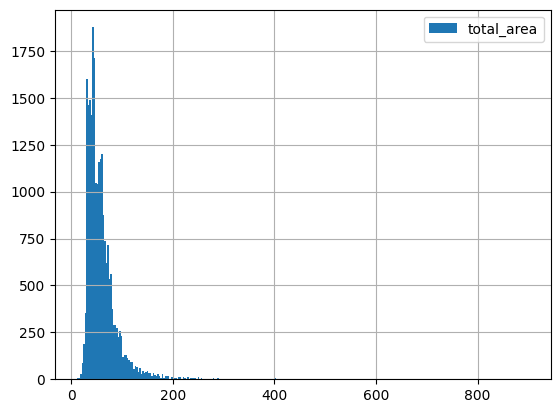

In [40]:
data['total_area'].hist(bins=300,label='total_area')
plt.legend()
plt.show()

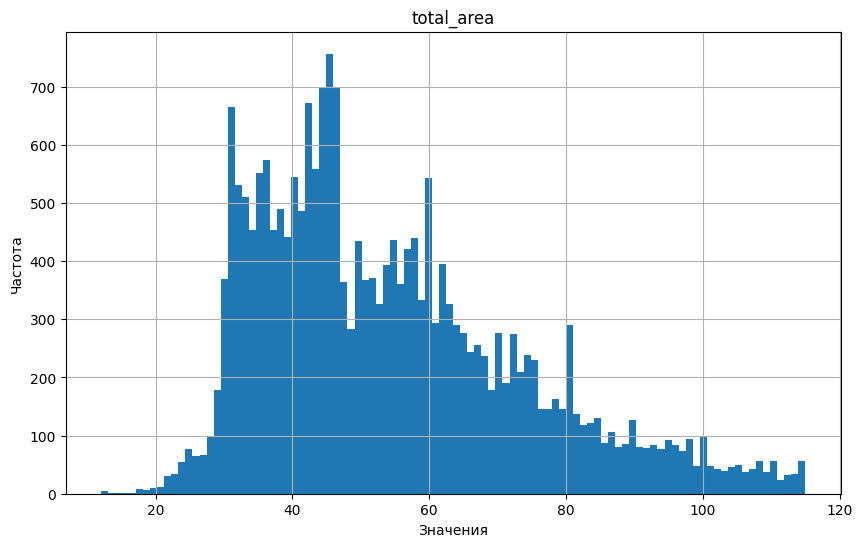

count    23618.000000
mean        60.383670
std         35.698494
min         12.000000
25%         40.000000
50%         52.000000
75%         70.000000
max        900.000000
Name: total_area, dtype: float64


In [41]:
total_area_borders = make_hist_by_serie(data['total_area'])

Больше всех квартир находяться в районе от 30 до 65 кв.м. Выбросы сыше 300 кв.м. обусловлены либо большими планировками либо отдельными частными домами.

Гистограммы для жилая площадь.

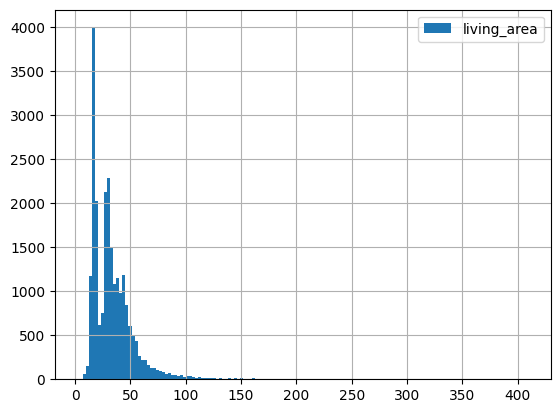

In [42]:
data['living_area'].hist(bins=150,label='living_area')
plt.legend()
plt.show()

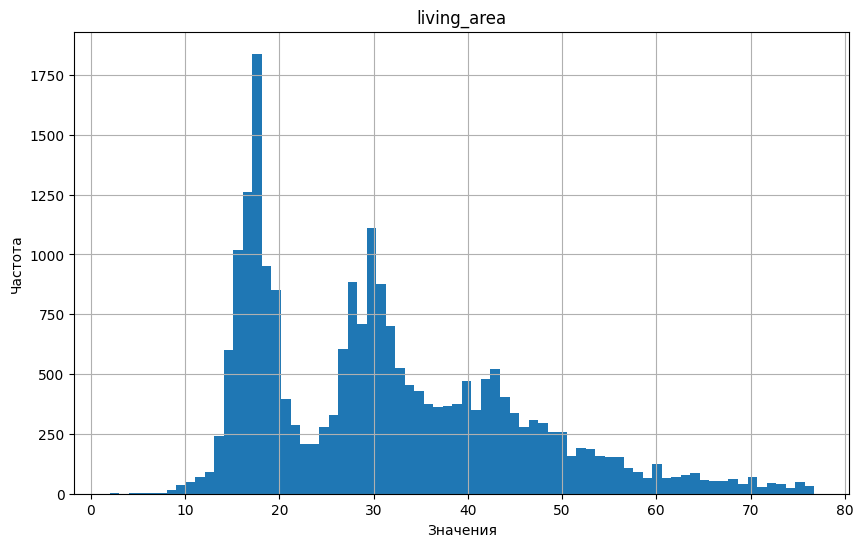

count    23618.000000
mean        34.576984
std         22.353596
min          2.000000
25%         19.000000
50%         30.000000
75%         42.100000
max        409.700000
Name: living_area, dtype: float64


In [43]:
living_area_borders = make_hist_by_serie(data['living_area'])

Больше всех жилая площадь находяться в районе от 20 до 40  кв.м.

Гистограммы для площадь кухни.

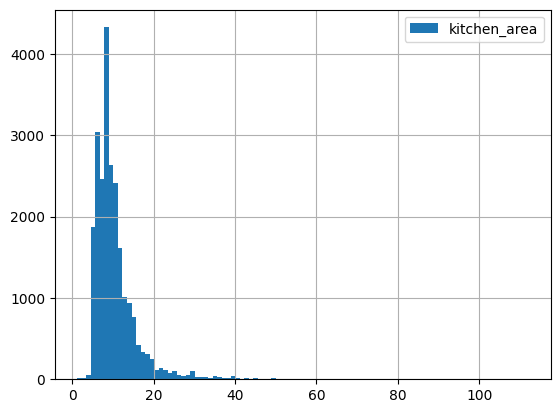

In [44]:
data['kitchen_area'].hist(bins=100,label='kitchen_area')
plt.legend()
plt.show()

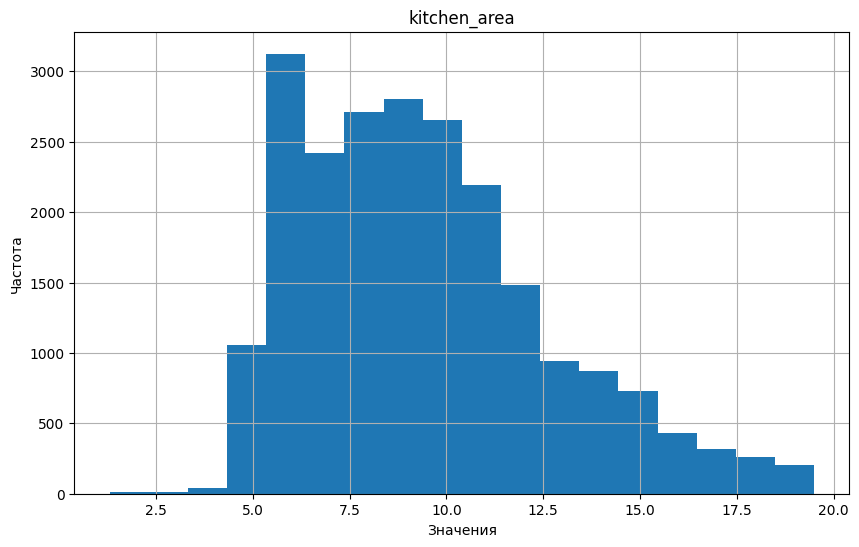

count    23618.000000
mean        10.585680
std          6.092613
min          1.300000
25%          7.000000
50%          9.100000
75%         12.000000
max        112.000000
Name: kitchen_area, dtype: float64


In [45]:
kitchen_area_borders = make_hist_by_serie(data['kitchen_area'])

 Площадь кухни находяться в районе от 5 до 10  кв.м.

Гистограммы для количества комнат.

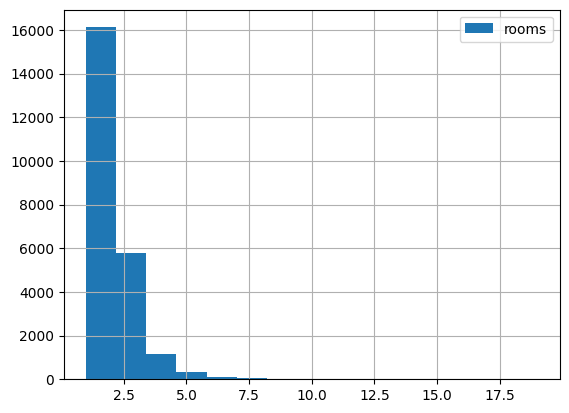

In [46]:
data['rooms'].hist(bins=15,label='rooms')
plt.legend()
plt.show()

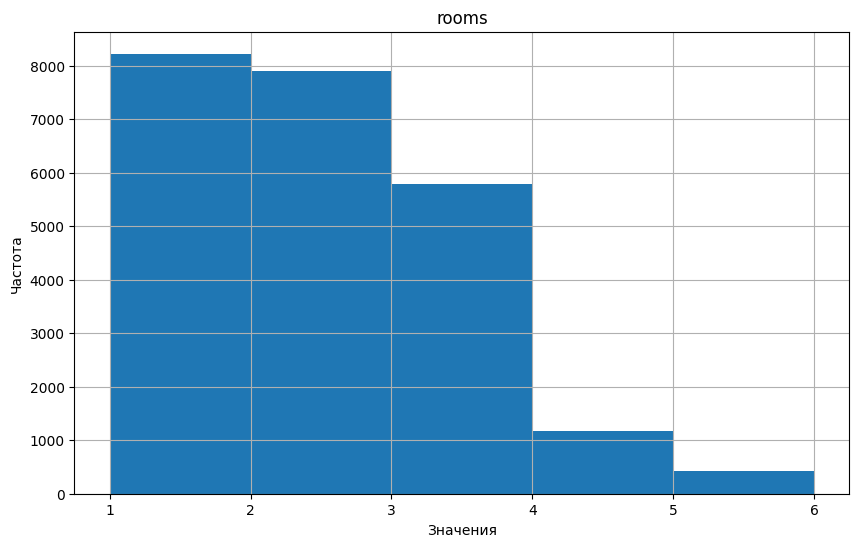

count    23618.000000
mean         2.079135
std          1.066948
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64


In [47]:
rooms_borders = make_hist_by_serie(data['rooms'])

Больше всех количество комнат 1 и 3 что  логично.

Гистограммы для цена объекта.

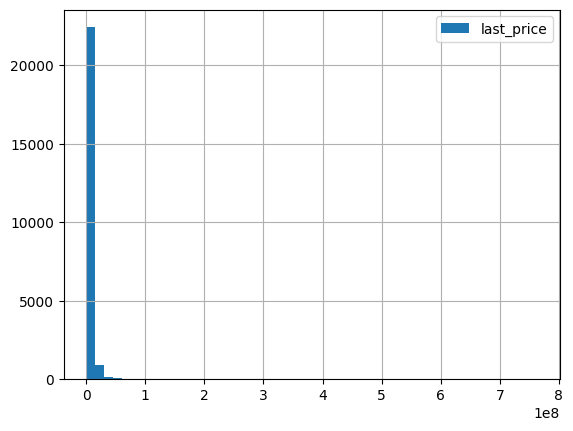

In [48]:
data['last_price'].hist(bins=50,label='last_price')
plt.legend()
plt.show()

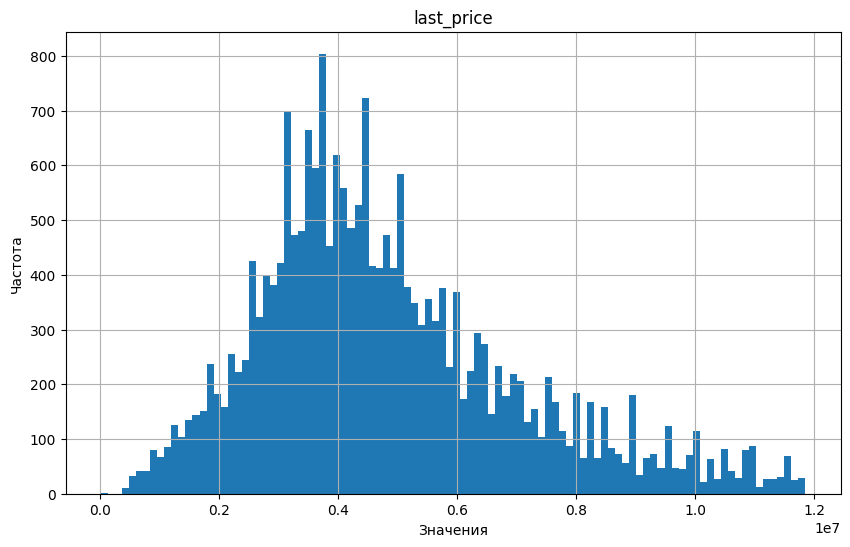

count    2.361800e+04
mean     6.551030e+06
std      1.090383e+07
min      1.219000e+04
25%      3.430000e+06
50%      4.650000e+06
75%      6.800000e+06
max      7.630000e+08
Name: last_price, dtype: float64


In [49]:
last_price_borders = make_hist_by_serie(data['last_price'])

Больше всех цена квартир находяться в районе от 1.2 до 6.6 миллион. рублей.

Гистограммы для высота потолков.

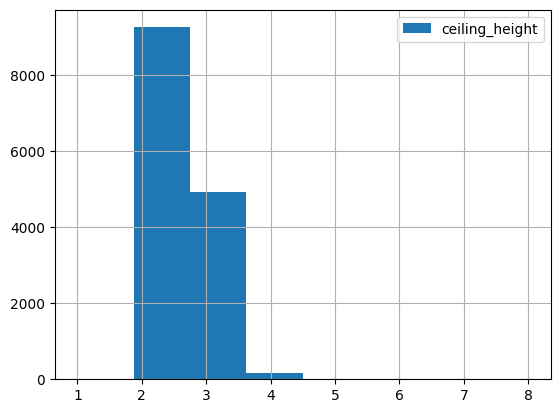

In [50]:
data['ceiling_height'].hist(bins=8, range=(1,8), label='ceiling_height')
plt.legend()
plt.show()

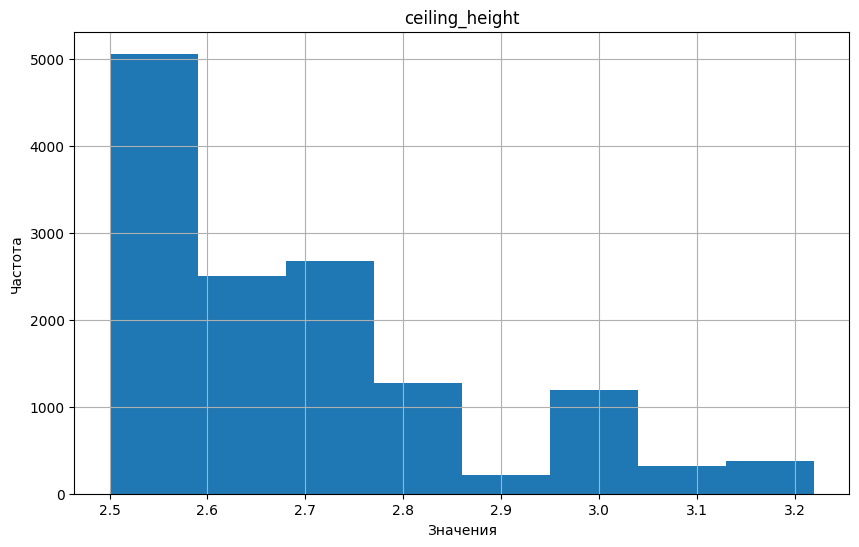

count    14429.000000
mean         2.773856
std          1.263755
min          2.500000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64


In [51]:
ceiling_height_borders = make_hist_by_serie(data['ceiling_height'])

Большинсво квартир имеют высоту от 2.5 до 2.8 м.

Гистограммы для тип этажа квартиры («первый», «последний», «другой»).

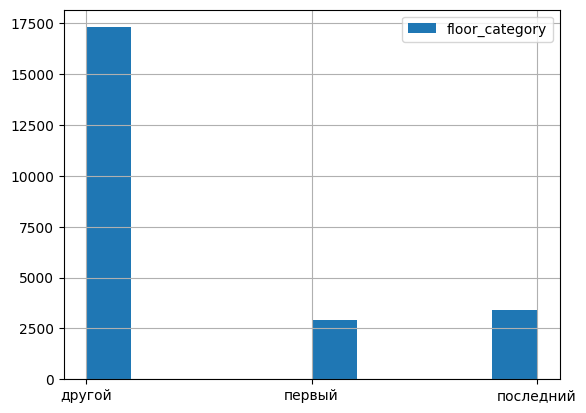

In [52]:
data['floor_category'].hist(bins=10, label='floor_category')
plt.legend()
plt.show()


Категория этаж 'другой' большее всех что логично

Гистограммы для общее количество этажей в доме.

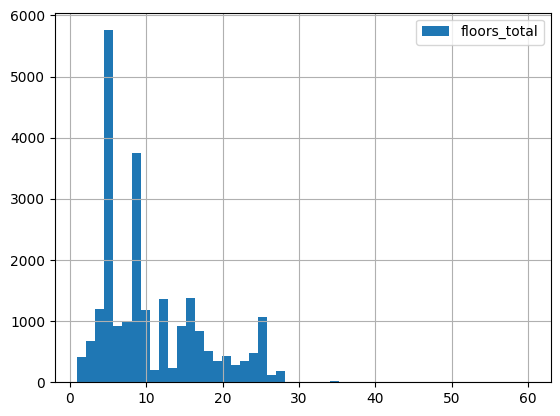

In [53]:
data['floors_total'].hist(bins=50, label='floors_total')
plt.legend()
plt.show()

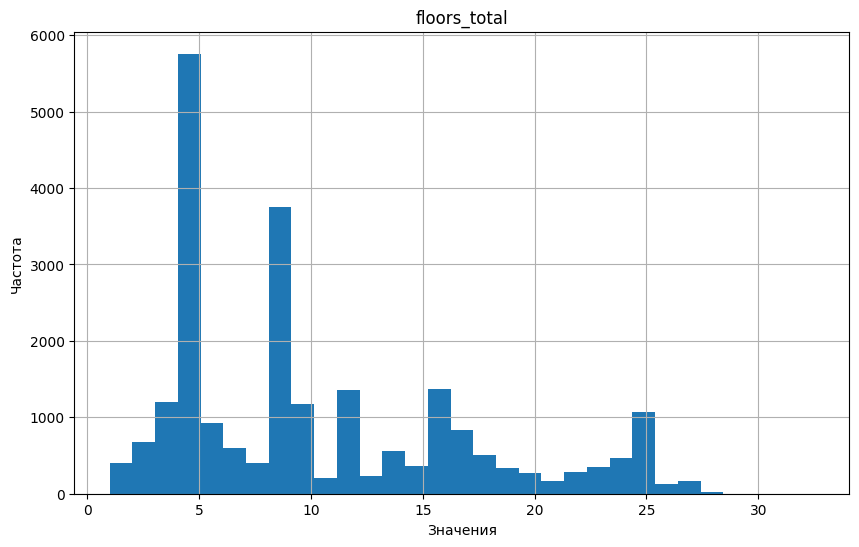

count    23618.000000
mean        10.682234
std          6.598016
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64


In [54]:
floors_total_borders = make_hist_by_serie(data['floors_total'])

Больше всех количество этаж от 5 до 12.

Гистограммы для расстояние до центра города в метрах.

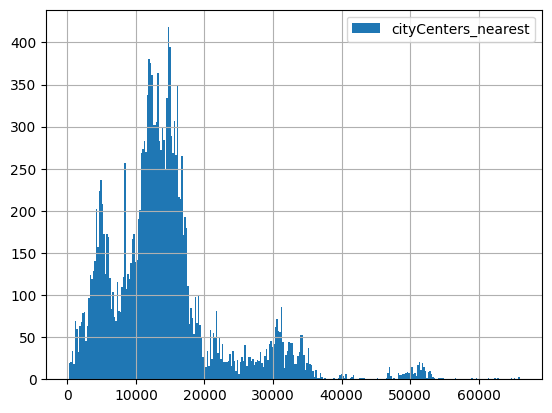

In [55]:
data['cityCenters_nearest'].hist(bins=300,label='cityCenters_nearest')
plt.legend()
plt.show()

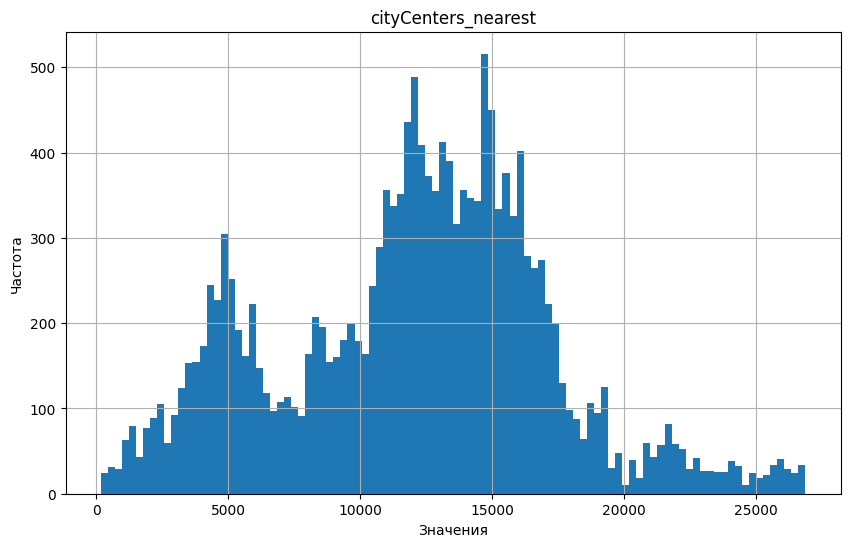

count    18138.000000
mean     14187.919396
std       8607.903937
min        181.000000
25%       9234.000000
50%      13095.000000
75%      16293.000000
max      65968.000000
Name: cityCenters_nearest, dtype: float64


In [56]:
cityCenters_nearest_borders = make_hist_by_serie(data['cityCenters_nearest'])

Расстояния до центра в промежутке от 9 км до 16 км.

Гистограммы для расстояние до ближайшего парка.

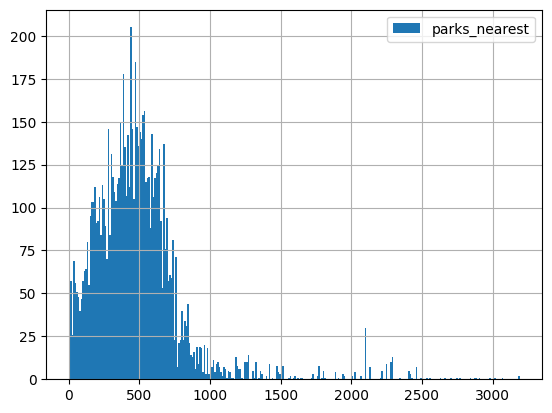

In [57]:
data['parks_nearest'].hist(bins=300,label='parks_nearest')
plt.legend()
plt.show()

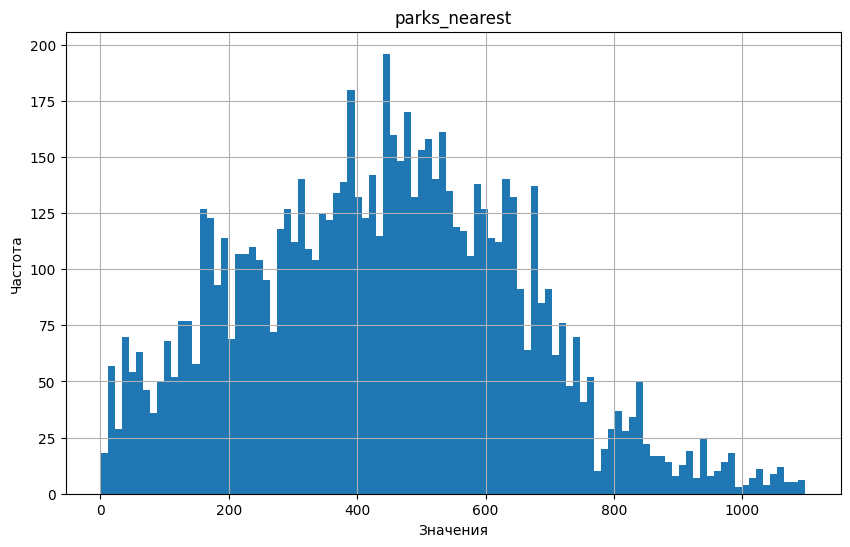

count    8053.000000
mean      490.840184
std       342.761460
min         1.000000
25%       288.000000
50%       454.000000
75%       612.000000
max      3190.000000
Name: parks_nearest, dtype: float64


In [58]:
parks_nearest_borders = make_hist_by_serie(data['parks_nearest'])

Расстояния до ближайшего парка в районе от 250 м до 600 метр.

Избавимся от выбросов по значимым для нас факторам. Созданная функция дает границы значимых данных и исключает выбросы в них.

In [59]:
print('Количество значений до удаления выбросов:', data.shape[0])
good_by_area_flats_sales_data = data.query(
    '@total_area_borders[0] <= total_area <=  @total_area_borders[1]')
print('Количество значений хороших по общей площади:', good_by_area_flats_sales_data.shape[0])
good_by_living_area_flats_sales_data = data.query(
    '@living_area_borders[0] <= living_area <=  @living_area_borders[1]')
print('Количество значений хороших по жилой площади:', good_by_living_area_flats_sales_data.shape[0])
good_by_kitchen_area_flats_sales_data = data.query(
    '@kitchen_area_borders[0] <= kitchen_area <=  @kitchen_area_borders[1]')
print('Количество значений хороших по кухонной площади:', good_by_kitchen_area_flats_sales_data.shape[0])
good_by_last_price_flats_sales_data = data.query(
    '@last_price_borders[0] <= last_price <=  @last_price_borders[1]')
print('Количество значений хороших по цене  кв.м.:', good_by_last_price_flats_sales_data.shape[0])
good_by_rooms_flats_sales_data = data.query(
    '@rooms_borders[0] <= rooms <=  @rooms_borders[1]')
print('Количество значений хороших по поличеству комнат:', good_by_rooms_flats_sales_data.shape[0])
good_by_ceiling_height_flats_sales_data = data.query(
    '@ceiling_height_borders[0] <= ceiling_height <=  @ceiling_height_borders[1]')
print('Количество значений хороших по высоте потолков:', good_by_ceiling_height_flats_sales_data.shape[0])
good_by_floors_total_flats_sales_data = data.query(
    '@floors_total_borders[0] <= floors_total <=  @floors_total_borders[1]')
print('Количество значений хороших по количество этажей в доме:', good_by_floors_total_flats_sales_data.shape[0])
good_by_cityCenters_nearest_flats_sales_data = data.query(
    '@cityCenters_nearest_borders[0] <= cityCenters_nearest <=  @cityCenters_nearest_borders[1]')
print('Количество значений хороших по расстояния до центра:', good_by_cityCenters_nearest_flats_sales_data.shape[0])
good_by_parks_nearest_flats_sales_data = data.query(
    '@parks_nearest_borders[0] <= parks_nearest <=  @parks_nearest_borders[1]')
print('Количество значений хороших по расстояния до ближайшего парка:', good_by_parks_nearest_flats_sales_data.shape[0])

Количество значений до удаления выбросов: 23618
Количество значений хороших по общей площади: 22401
Количество значений хороших по жилой площади: 22732
Количество значений хороших по кухонной площади: 22278
Количество значений хороших по цене  кв.м.: 21553
Количество значений хороших по поличеству комнат: 23528
Количество значений хороших по высоте потолков: 13615
Количество значений хороших по количество этажей в доме: 23587
Количество значений хороших по расстояния до центра: 16417
Количество значений хороших по расстояния до ближайшего парка: 7739


*Пункт2.*

Гистограмма для по времени продажи квартиры.

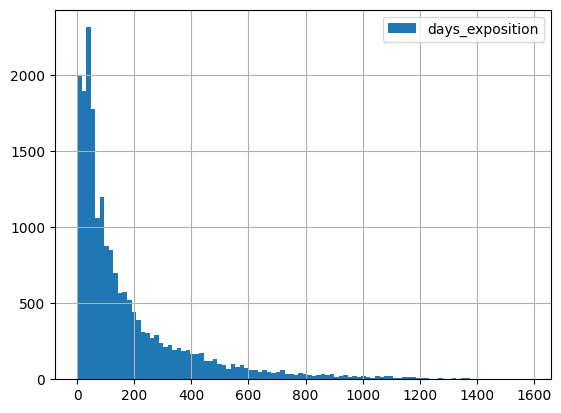

In [60]:
data['days_exposition'].hist(bins=100,label='days_exposition')
plt.legend()
plt.show()

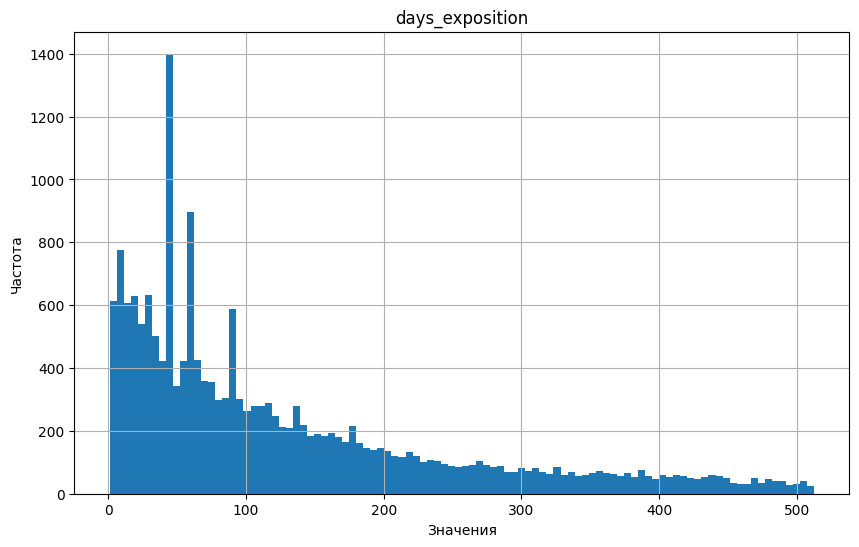

count    20448.000000
mean       181.008069
std        219.938780
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64


In [61]:
days_exposition_borders = make_hist_by_serie(data['days_exposition'])

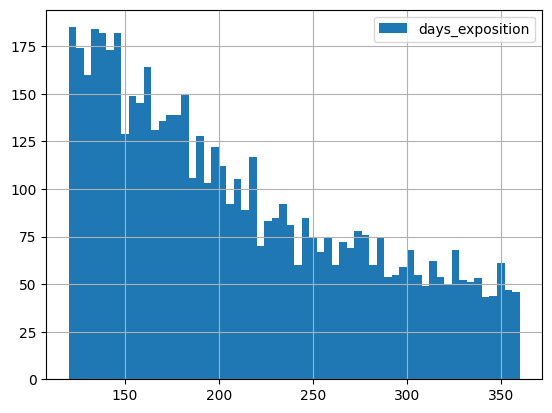

In [62]:
data['days_exposition'].hist(bins=60, range=(120,360), label='days_exposition')
plt.legend()
plt.show()

- Среднее значение - 176 дня. Медианное - 94 дней.
- Обычно в крупных городах России квартира продается за 30-120 дней, продажи квартир могут затянуться до 180-360 дней. Текущий диапазон находится в хорошей зоне в 1-4 месяца.
- Быстрые продажи - странный фактор о договорной продажи через сервис или мошеннические действия. Считаю быстрые продажи до 7 дней. Необычно долгие продажи те, которые длятся больше года (360 дней).

Создадим срез от 7 дней до 360.

count    16711.000000
mean       107.345581
std         87.717124
min          7.000000
25%         42.000000
50%         78.000000
75%        156.000000
max        359.000000
Name: days_exposition, dtype: float64


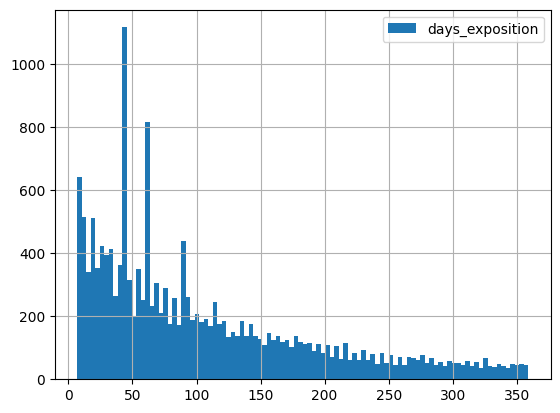

In [63]:
days_exposition = data.query('7 <= days_exposition <= 360')
print(days_exposition['days_exposition'].describe())
days_exposition['days_exposition'].hist(bins=100,label='days_exposition')
plt.legend()
plt.show()

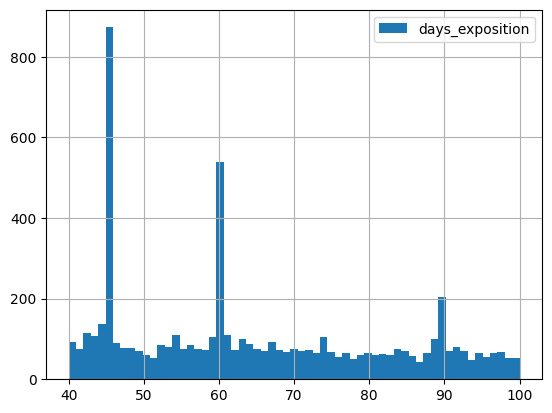

In [64]:
days_exposition['days_exposition'].hist(bins=61, range=(40,100),label='days_exposition')
plt.legend()
plt.show()

Много квартир продается за 45 и 60 дней. Так же есть локальный пик в 90 дней. Имеются техники риэлторов , которые продают квартиры за 45, 60 или 90 дней как главное правильно своей работы.

*Пункт 3.*

Составим корреляционные зависимости

In [65]:
prise_area_rooms = data.loc[:,['last_price', 'total_area', 'living_area', 'rooms', 'kitchen_area']]
prise_area_rooms.head()

,last_price,total_area,living_area,rooms,kitchen_area
0,13000000,108.0,51.00,3,25.0
1,3350000,40.4,18.60,1,11.0
2,5196000,56.0,34.30,2,8.3
3,64900000,159.0,89.78,3,29.8
4,10000000,100.0,32.00,2,41.0


In [66]:
prise_area_rooms.corr()

,last_price,total_area,living_area,rooms,kitchen_area
last_price,1.000000,0.653676,0.585691,0.365395,0.516969
total_area,0.653676,1.000000,0.945907,0.760408,0.661970
living_area,0.585691,0.945907,1.000000,0.831921,0.504985
rooms,0.365395,0.760408,0.831921,1.000000,0.323952
kitchen_area,0.516969,0.661970,0.504985,0.323952,1.000000


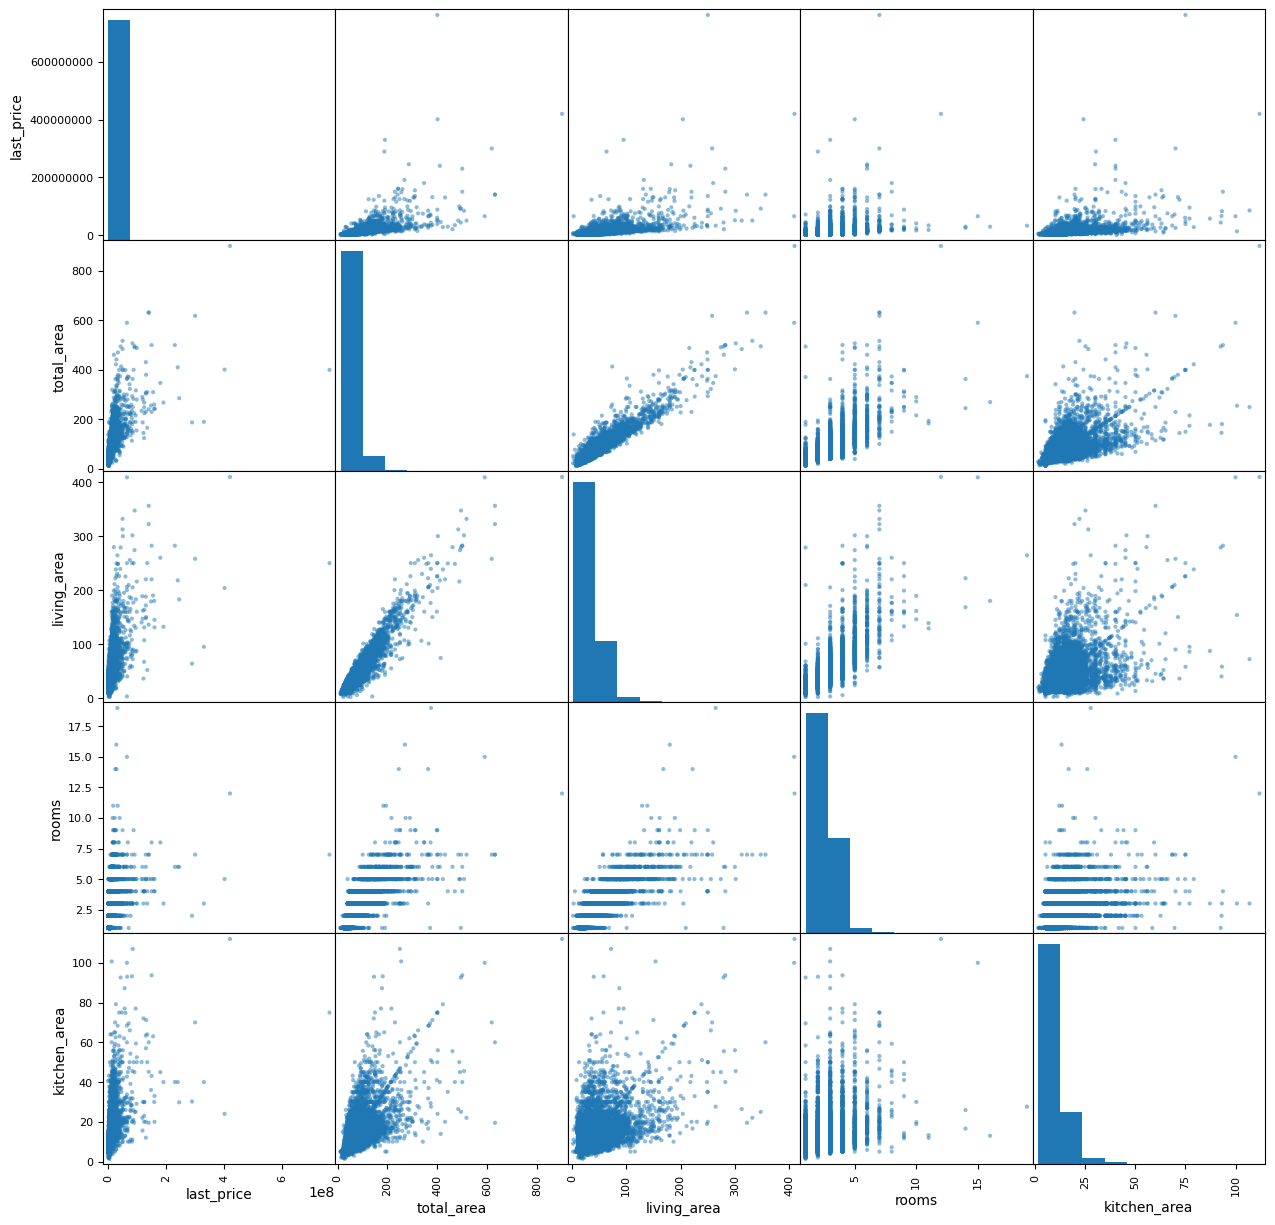

In [67]:
pd.plotting.scatter_matrix(prise_area_rooms, figsize=(15, 15))
plt.show()

В целом получаем:

- Цена имеет слабую зависимость от площади. Большинство квартир продаются в районе от 60 тыс. до 140 тыс за кв. м. с площадью от 28 кв.м. до 80 кв.м.
- Количество комнат отрицательно влияет на стоимость, но слабо. Комнаты напрямую определяют размер общей площади. Самые распространенные квартиры имеют от 1 до 3 комнат.


Построим гистограммы для каждой категории и выделим укрупненный диапозон с ценой.

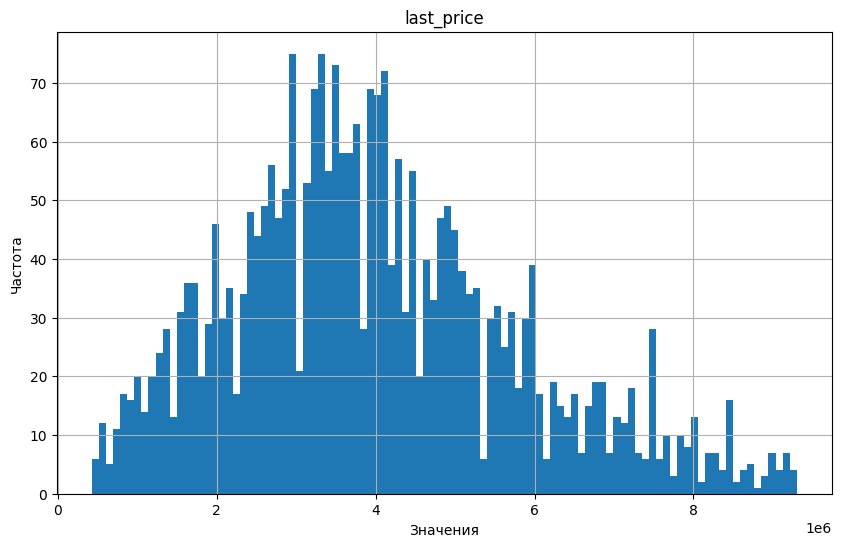

count    2.904000e+03
mean     4.810918e+06
std      5.107410e+06
min      4.300000e+05
25%      2.800000e+06
50%      3.900000e+06
75%      5.400000e+06
max      1.350000e+08
Name: last_price, dtype: float64


(430000.0, 9300000.0)

In [68]:
make_hist_by_serie(data[data['floor_category'] == 'первый']['last_price'])

Квартиры на первом этаже не популярны.

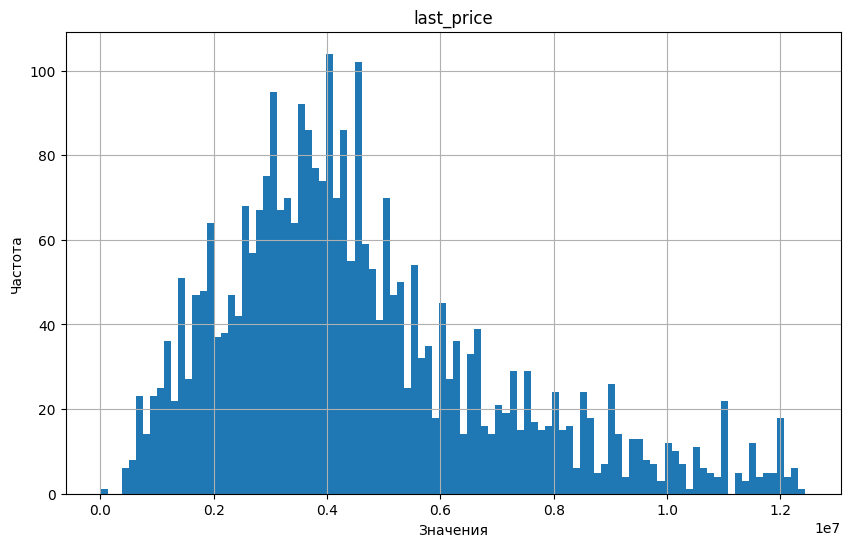

count    3.403000e+03
mean     7.372365e+06
std      2.050406e+07
min      1.219000e+04
25%      3.040000e+06
50%      4.350000e+06
75%      6.800000e+06
max      7.630000e+08
Name: last_price, dtype: float64


(12190.0, 12440000.0)

In [69]:
make_hist_by_serie(data[data['floor_category'] == 'последний']['last_price'])

Однозначно квартиры на последнем этаже дороже, чем на первом.

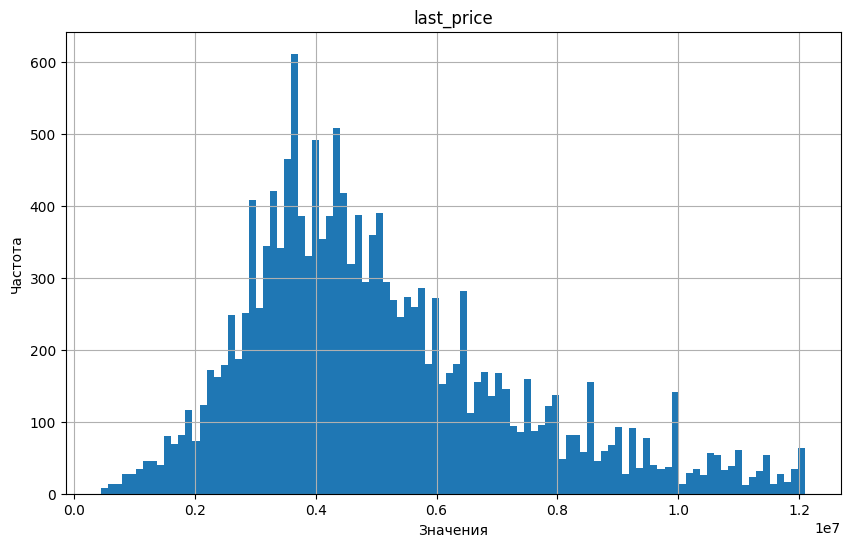

count    1.731100e+04
mean     6.681484e+06
std      8.634507e+06
min      4.500000e+05
25%      3.600000e+06
50%      4.850000e+06
75%      7.000000e+06
max      3.300000e+08
Name: last_price, dtype: float64


(450000.0, 12100000.0)

In [70]:
make_hist_by_serie(data[data['floor_category'] == 'другой']['last_price'])

Другие этажи определенно стоят дороже, чем первые. Их стоимость в целом выше от квартир на последнем этаже, но нет так сильно. В целом люди платять болше за квартиры не на первом и не на последнем этаже.

Построим  зависимости  даты размещения: дня недели, месяца и года от цена.

In [71]:
prise_weekday_month_year = data.loc[:,['last_price', 'weekday', 'month', 'year']]
prise_weekday_month_year.head()

,last_price,weekday,month,year
0,13000000,3,3,2019
1,3350000,1,12,2018
2,5196000,3,8,2015
3,64900000,4,7,2015
4,10000000,1,6,2018


Пройдемся по каждому столбцу. Начнем с дня недели.

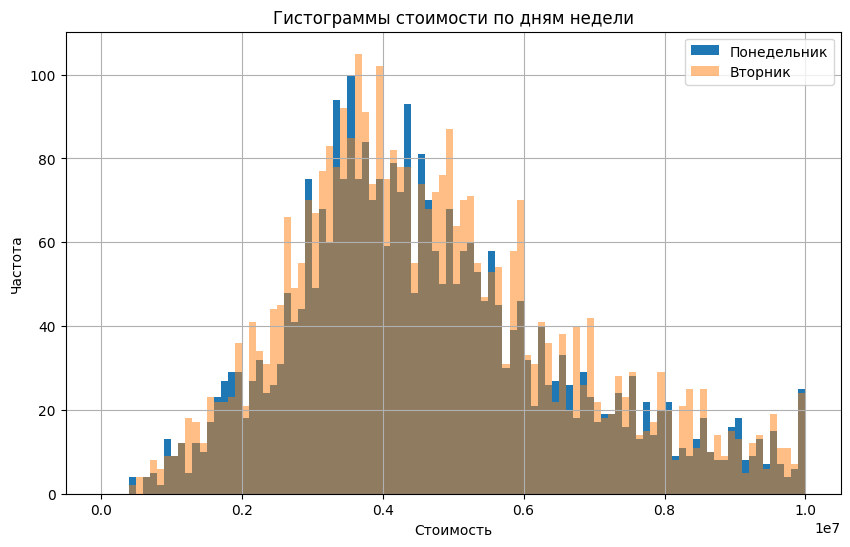

In [72]:
plt.figure(figsize=(10, 6))
prise_weekday_month_year[prise_weekday_month_year['weekday'] == 0]['last_price'].hist(bins=100, range=(0,10000000), label='Понедельник')
prise_weekday_month_year[prise_weekday_month_year['weekday'] == 1]['last_price'].hist(bins=100, range=(0,10000000), alpha=0.5, label='Вторник')
plt.title('Гистограммы стоимости по дням недели')
plt.xlabel('Стоимость')
plt.ylabel('Частота')
# Добавление легенды
plt.legend()
# Отображение графика
plt.show()

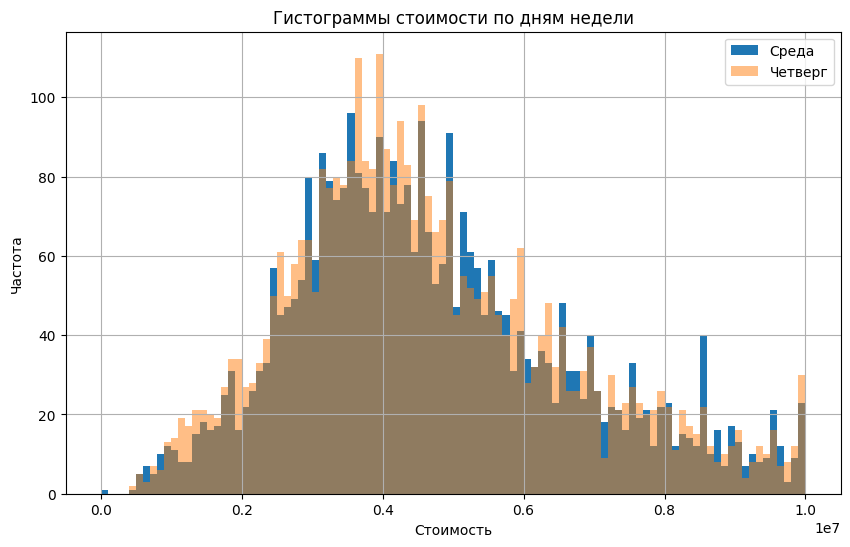

In [73]:
plt.figure(figsize=(10, 6))
prise_weekday_month_year[prise_weekday_month_year['weekday'] == 2]['last_price'].hist(bins=100, range=(0,10000000), label='Среда')
prise_weekday_month_year[prise_weekday_month_year['weekday'] == 3]['last_price'].hist(bins=100, range=(0,10000000), alpha=0.5, label='Четверг')
plt.title('Гистограммы стоимости по дням недели')
plt.xlabel('Стоимость')
plt.ylabel('Частота')
# Добавление легенды
plt.legend()
# Отображение графика
plt.show()

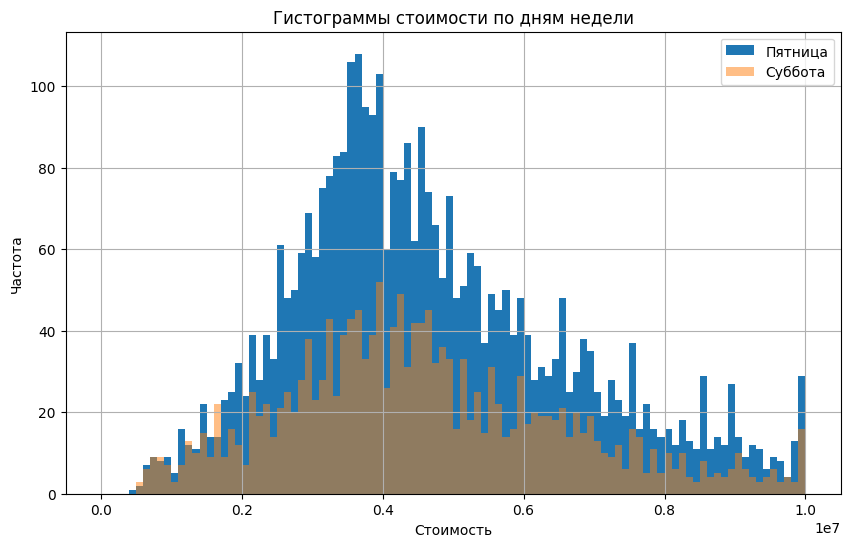

In [74]:
plt.figure(figsize=(10, 6))
prise_weekday_month_year[prise_weekday_month_year['weekday'] == 4]['last_price'].hist(bins=100, range=(0,10000000), label='Пятница')
prise_weekday_month_year[prise_weekday_month_year['weekday'] == 5]['last_price'].hist(bins=100, range=(0,10000000), alpha=0.5, label='Суббота')
plt.title('Гистограммы стоимости по дням недели')
plt.xlabel('Стоимость')
plt.ylabel('Частота')
# Добавление легенды
plt.legend()
# Отображение графика
plt.show()

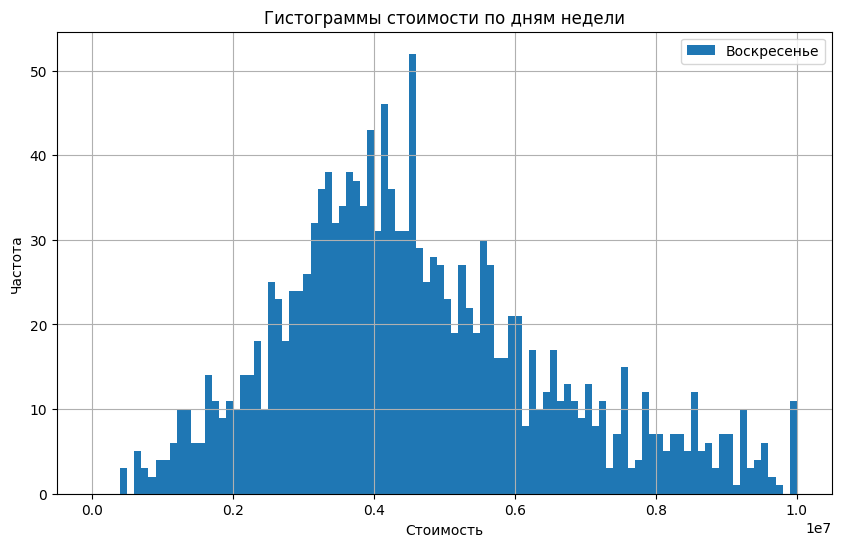

In [75]:
plt.figure(figsize=(10, 6))
prise_weekday_month_year[prise_weekday_month_year['weekday'] == 6]['last_price'].hist(bins=100, range=(0,10000000), label='Воскресенье')
plt.title('Гистограммы стоимости по дням недели')
plt.xlabel('Стоимость')
plt.ylabel('Частота')
# Добавление легенды
plt.legend()
# Отображение графика
plt.show()

В общей картине стомость квартиры не зависит от дня продажи. Единственное что меняется - это количество проданных квартир. Больше всего квартир продают за будние дни, когда у риелторов и агенств основной режим работы.

Изучим гистограммы по столбцу месяцев.

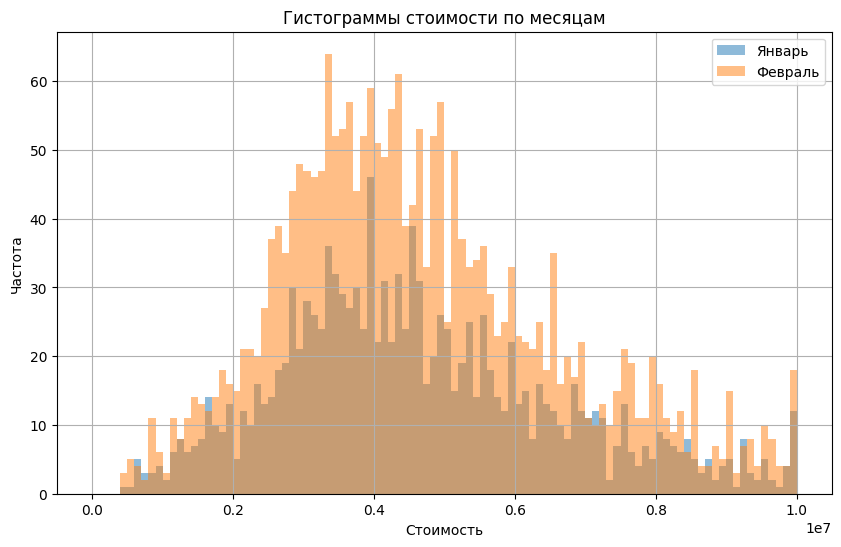

In [76]:
plt.figure(figsize=(10, 6))


prise_weekday_month_year[prise_weekday_month_year['month'] == 1]['last_price'].hist(bins=100, range=(0, 10000000), alpha=0.5, label='Январь')
prise_weekday_month_year[prise_weekday_month_year['month'] == 2]['last_price'].hist(bins=100, range=(0, 10000000), alpha=0.5, label='Февраль')

# Добавление названий к графику и осям
plt.title('Гистограммы стоимости по месяцам')
plt.xlabel('Стоимость')
plt.ylabel('Частота')

# Добавление легенды
plt.legend()

# Отображение графика
plt.show()

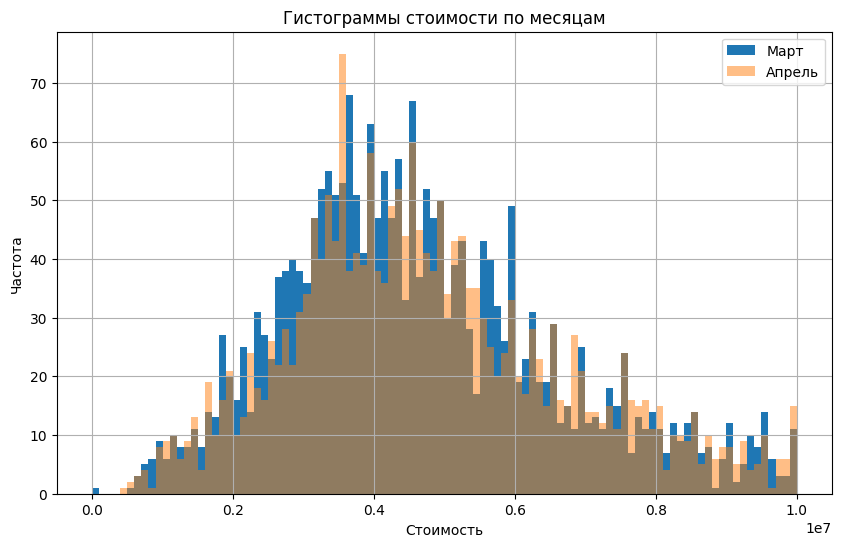

In [77]:
plt.figure(figsize=(10, 6))

prise_weekday_month_year[prise_weekday_month_year['month'] == 3]['last_price'].hist(bins=100, range=(0, 10000000), label='Март')
prise_weekday_month_year[prise_weekday_month_year['month'] == 4]['last_price'].hist(bins=100, range=(0, 10000000), alpha=0.5, label='Апрель')

# Добавление названий к графику и осям
plt.title('Гистограммы стоимости по месяцам')
plt.xlabel('Стоимость')
plt.ylabel('Частота')

# Добавление легенды
plt.legend()

# Отображение графика
plt.show()

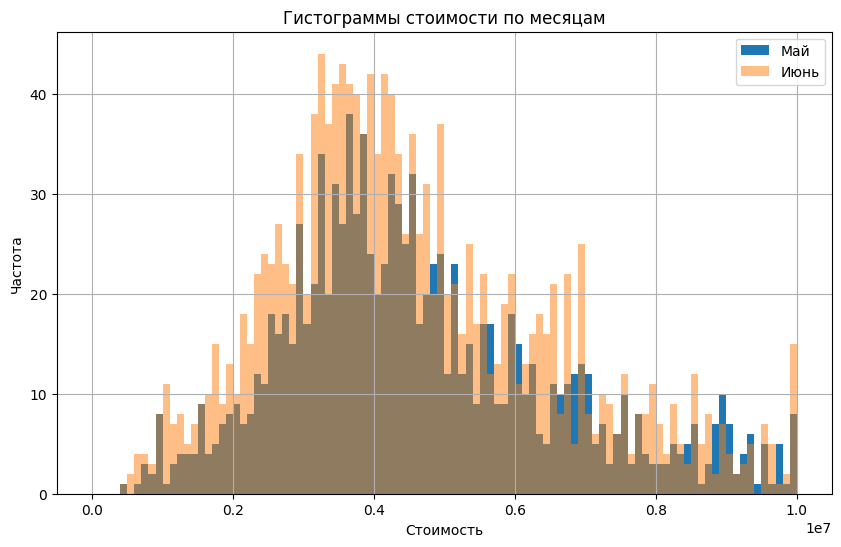

In [78]:
plt.figure(figsize=(10, 6))

prise_weekday_month_year[prise_weekday_month_year['month'] == 5]['last_price'].hist(bins=100, range=(0, 10000000), label='Май')
prise_weekday_month_year[prise_weekday_month_year['month'] == 6]['last_price'].hist(bins=100, range=(0, 10000000), alpha=0.5, label='Июнь')

# Добавление названий к графику и осям
plt.title('Гистограммы стоимости по месяцам')
plt.xlabel('Стоимость')
plt.ylabel('Частота')

# Добавление легенды
plt.legend()

# Отображение графика
plt.show()

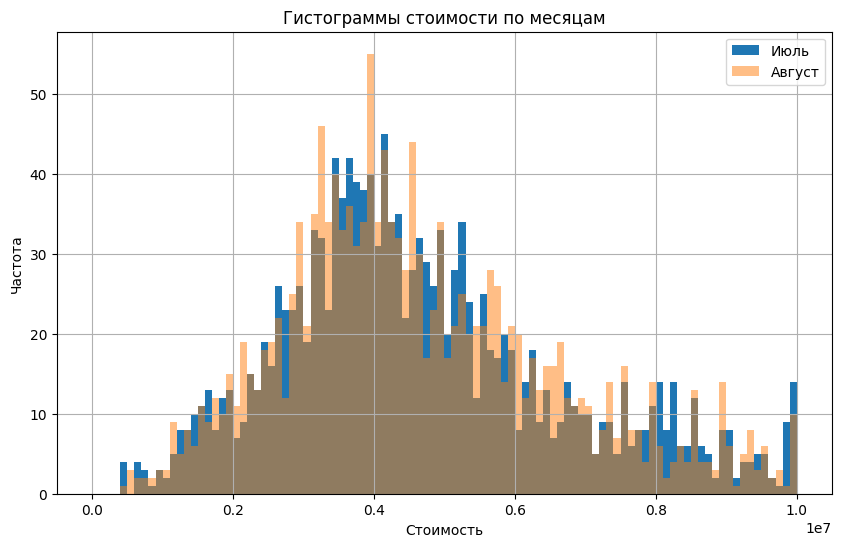

In [79]:
plt.figure(figsize=(10, 6))

prise_weekday_month_year[prise_weekday_month_year['month'] == 7]['last_price'].hist(bins=100, range=(0, 10000000), label='Июль')
prise_weekday_month_year[prise_weekday_month_year['month'] == 8]['last_price'].hist(bins=100, range=(0, 10000000), alpha=0.5, label='Август')

# Добавление названий к графику и осям
plt.title('Гистограммы стоимости по месяцам')
plt.xlabel('Стоимость')
plt.ylabel('Частота')

# Добавление легенды
plt.legend()

# Отображение графика
plt.show()

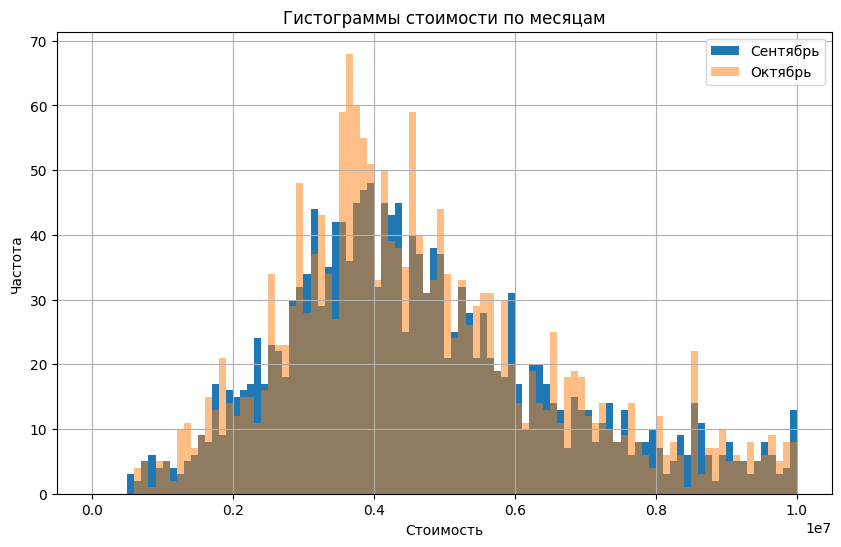

In [80]:
plt.figure(figsize=(10, 6))

prise_weekday_month_year[prise_weekday_month_year['month'] == 9]['last_price'].hist(bins=100, range=(0, 10000000), label='Сентябрь')
prise_weekday_month_year[prise_weekday_month_year['month'] == 10]['last_price'].hist(bins=100, range=(0, 10000000), alpha=0.5, label='Октябрь')

# Добавление названий к графику и осям
plt.title('Гистограммы стоимости по месяцам')
plt.xlabel('Стоимость')
plt.ylabel('Частота')

# Добавление легенды
plt.legend()

# Отображение графика
plt.show()

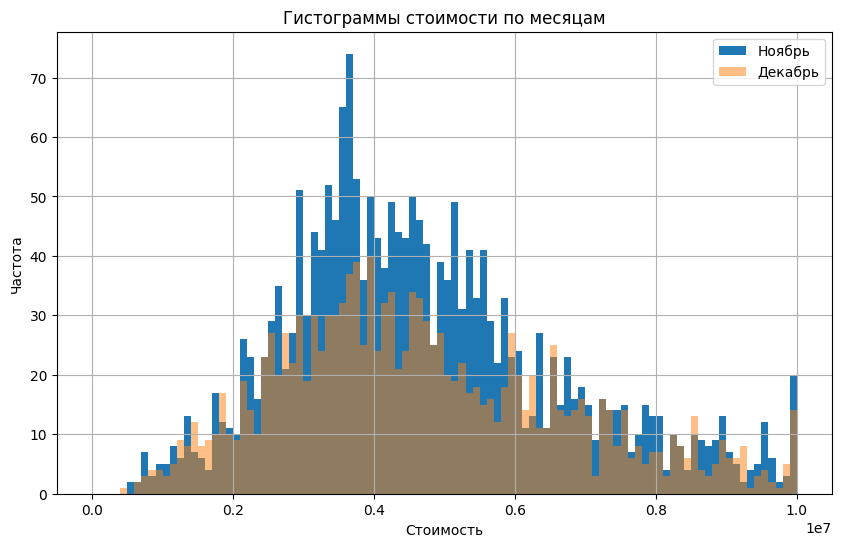

In [81]:
plt.figure(figsize=(10, 6))

prise_weekday_month_year[prise_weekday_month_year['month'] == 11]['last_price'].hist(bins=100, range=(0, 10000000), label='Ноябрь')
prise_weekday_month_year[prise_weekday_month_year['month'] == 12]['last_price'].hist(bins=100, range=(0, 10000000), alpha=0.5, label='Декабрь')

# Добавление названий к графику и осям
plt.title('Гистограммы стоимости по месяцам')
plt.xlabel('Стоимость')
plt.ylabel('Частота')

# Добавление легенды
plt.legend()

# Отображение графика
plt.show()

По графикам видно, что основные продажи так же идут от 2.3 млн до 5 млн каждый месяц. Отличается лишь количество продаж на декабрь и январь. В эти месяцы меньше всего продаж квартир.

Пройдемся по столбцу год.

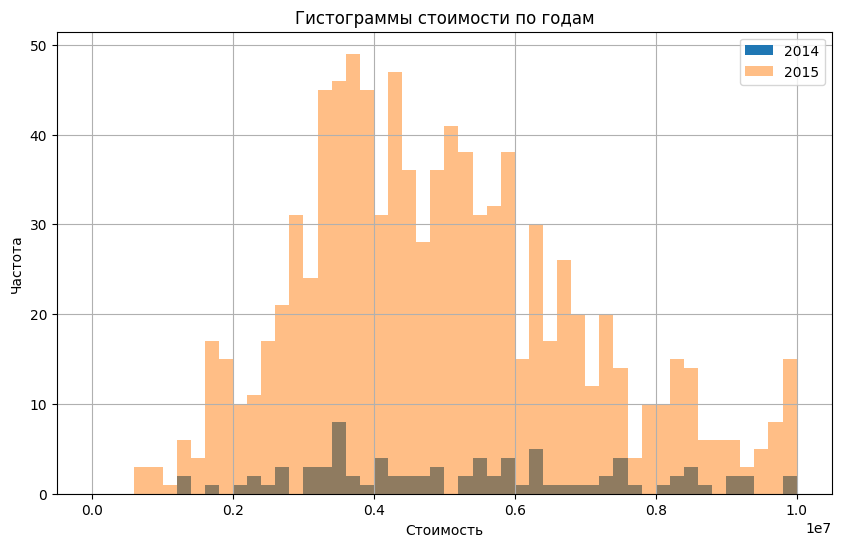

In [82]:
plt.figure(figsize=(10, 6))


prise_weekday_month_year[prise_weekday_month_year['year'] == 2014]['last_price'].hist(bins=50, range=(0, 10000000), label='2014')
prise_weekday_month_year[prise_weekday_month_year['year'] == 2015]['last_price'].hist(bins=50, range=(0, 10000000), alpha=0.5, label='2015')

plt.title('Гистограммы стоимости по годам')
plt.xlabel('Стоимость')
plt.ylabel('Частота')
plt.legend()
plt.show()

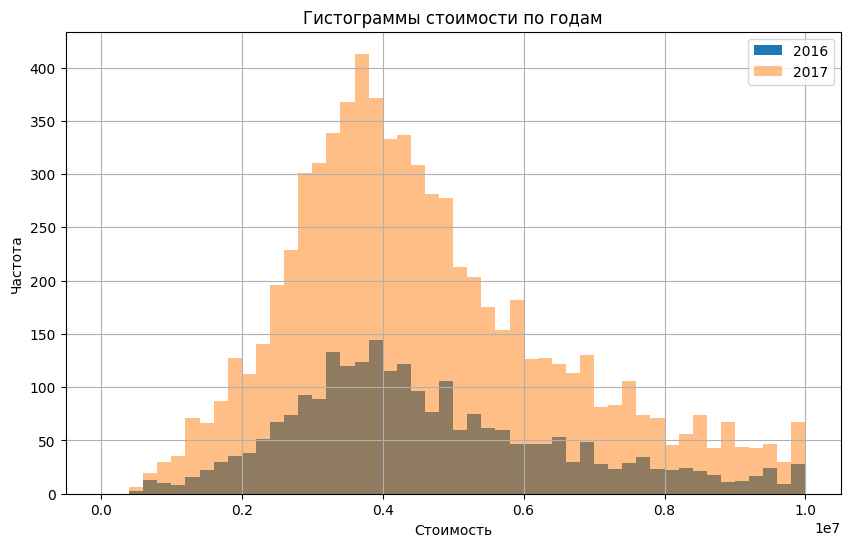

In [83]:
plt.figure(figsize=(10, 6))


prise_weekday_month_year[prise_weekday_month_year['year'] == 2016]['last_price'].hist(bins=50, range=(0, 10000000), label='2016')
prise_weekday_month_year[prise_weekday_month_year['year'] == 2017]['last_price'].hist(bins=50, range=(0, 10000000), alpha=0.5, label='2017')


plt.title('Гистограммы стоимости по годам')
plt.xlabel('Стоимость')
plt.ylabel('Частота')
plt.legend()
plt.show()

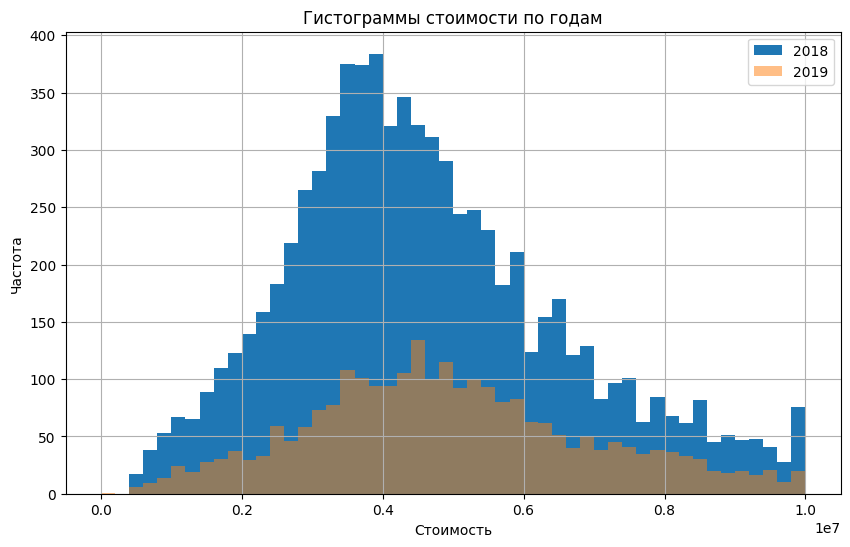

In [84]:
plt.figure(figsize=(10, 6))


prise_weekday_month_year[prise_weekday_month_year['year'] == 2018]['last_price'].hist(bins=50, range=(0, 10000000), label='2018')
prise_weekday_month_year[prise_weekday_month_year['year'] == 2019]['last_price'].hist(bins=50, range=(0, 10000000), alpha=0.5, label='2019')

plt.title('Гистограммы стоимости по годам')
plt.xlabel('Стоимость')
plt.ylabel('Частота')
plt.legend()
plt.show()

По графикам видно небольшое смещение пика вправо. Легкая положительная зависимость есть, она исходит из инфляции в стране.

*Пункт 4.*

Для оптимизации поиска названия применим функцию для создания коротких имен, чтобы исключить дубликаты.

In [85]:
data['short_locality_name'] = data['locality_name'].apply(make_short_name)
top_10_locality_name = data['short_locality_name'].value_counts()[:10]
print(top_10_locality_name)
top_10_locality_name = top_10_locality_name.index
top_10_locality_name

short_locality_name
Санкт-Петербург    15688
Мурино               590
Кудрово              471
Шушары               440
Всеволожск           397
Пушкин               366
Колпино              337
Парголово            326
Гатчина              307
Выборг               235
Name: count, dtype: int64


Index(['Санкт-Петербург', 'Мурино', 'Кудрово', 'Шушары', 'Всеволожск',
       'Пушкин', 'Колпино', 'Парголово', 'Гатчина', 'Выборг'],
      dtype='object', name='short_locality_name')

In [86]:
top_10_pivot_table_mean = (data
                      .query('short_locality_name in @top_10_locality_name')
                      .pivot_table(index='short_locality_name', values='price_per_metre', aggfunc='mean')
                      .sort_values('price_per_metre', ascending=False))
top_10_pivot_table_mean

,price_per_metre
short_locality_name,
Санкт-Петербург,114876.814159
Пушкин,103147.825574
Кудрово,95326.179108
Парголово,90205.423374
Мурино,86087.512017
Шушары,78677.364318
Колпино,75443.972849
Гатчина,68746.146515
Всеволожск,68719.320378


In [87]:
top_10_pivot_table_min_max = (data
                      .query('short_locality_name in @top_10_locality_name')
                      .pivot_table(index='short_locality_name', values='price_per_metre', aggfunc=['min','max']))
top_10_pivot_table_min_max

,min,max
,price_per_metre,price_per_metre
short_locality_name,,
Всеволожск,31400.00,640422.35
Выборг,18750.00,107473.12
Гатчина,10507.25,146315.79
Колпино,47957.37,125000.00
Кудрово,54160.35,160401.00
Мурино,50000.00,138580.25
Парголово,39205.96,138522.43
Пушкин,59836.07,256521.74


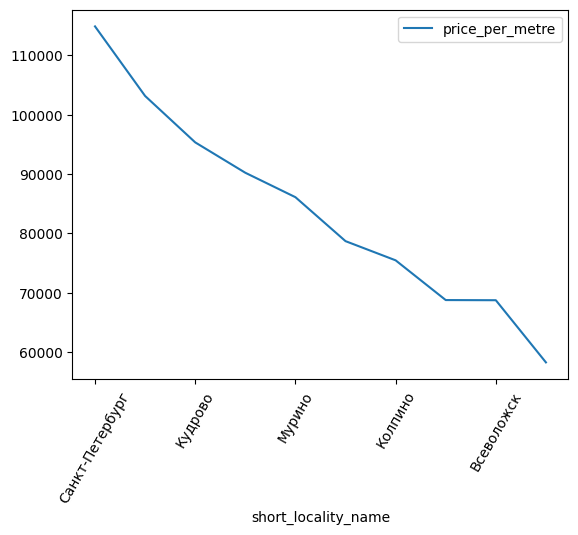

In [88]:
top_10_pivot_table_mean.plot(kind='line', rot=60)
plt.show()

Из данных видно во все лидеры вырвался Санкт-Петербург.

*Пункт 5.*

In [89]:
SP_flats_sales_data = data.query('locality_name == "Санкт-Петербург"')
SP_flats_sales_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15688 entries, 0 to 23697
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   total_images            15688 non-null  int64         
 1   last_price              15688 non-null  int32         
 2   total_area              15688 non-null  float64       
 3   first_day_exposition    15688 non-null  object        
 4   rooms                   15688 non-null  int64         
 5   ceiling_height          10071 non-null  float64       
 6   floors_total            15688 non-null  int32         
 7   living_area             15688 non-null  float64       
 8   floor                   15688 non-null  int64         
 9   is_apartment            15688 non-null  bool          
 10  studio                  15688 non-null  bool          
 11  open_plan               15688 non-null  bool          
 12  kitchen_area            15688 non-null  float64    

In [90]:
price_per_km = (SP_flats_sales_data
               .pivot_table(index='cityCenters_nearest_km', values='price_per_metre', aggfunc='mean'))
price_per_km

,price_per_metre
cityCenters_nearest_km,
0.0,245833.530370
1.0,177005.407604
2.0,157849.007290
3.0,121387.453743
4.0,133376.252857
5.0,140544.732263
6.0,151032.026224
7.0,156176.879524
8.0,125783.378418


In [91]:
plot_price_per_km = price_per_km
plot_price_per_km['km'] = price_per_km.index
plot_price_per_km

,price_per_metre,km
cityCenters_nearest_km,,
0.0,245833.530370,0.0
1.0,177005.407604,1.0
2.0,157849.007290,2.0
3.0,121387.453743,3.0
4.0,133376.252857,4.0
5.0,140544.732263,5.0
6.0,151032.026224,6.0
7.0,156176.879524,7.0
8.0,125783.378418,8.0


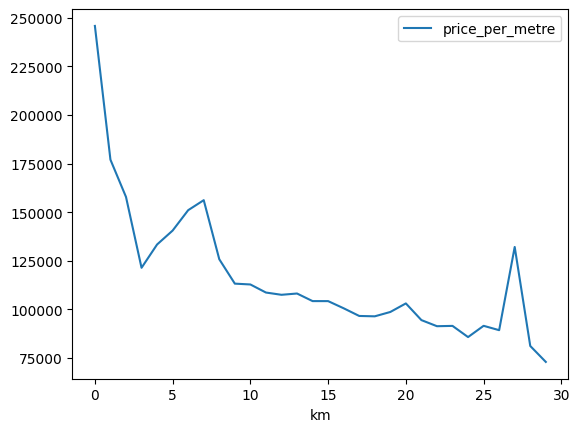

In [92]:
price_per_km.plot(x='km', y='price_per_metre' ,kind='line')
plt.show()

Центральной зоной можно считать квартиры в радиусе 3 км от цента Санкт-Петербурга. Локальный пик в районе 5-7 км обусловлен инфраструктурой. Локальный пик в 27 км обусловлен дороговизной квартир в Петергофе.

### Шаг 5. Напишите общий вывод

Проведена большая работа по данному проекту.

- Были определены аномалии и построена стратегия замены пропусков.
- Пропуски были заполнены максимально возможными способами, чтобы каждое значение могло влиять на гипотезы.
- Приведены типы данных для уменьшения используемой памяти и отображаемого вида в таблице.
- Созданы дополнительные столбцы для улучшения анализа данных.
- Даны ответы на заданные вопросы.

Система готова использовать следущие параметры для оценки стоимости недвижимости.

- Основным ориентиром для определения стоимости квартиры - это стоимость квадратного метра.
- Общая площадь, отношения жилой к общей и отношение кухонной к общей площади помогут определить самый предпочитаемый тип квартир.
- Даты продаж позволят определить, в какой момент лучше продвигать рекламную компанию по продаже домов. В какие месяцы или дни недели. Количество продаж по годам имеет естественную зависимость от количество жителей города.
- Этаж квартиры. В большинстве случаев люди редко берут квартиры на первом этаже из-за их небезопасности, а квартиры на последним - из-за возможных проблем с крышей. Соотвественно самыми дорогими считаются комфортные квартиры между первым и последним этажом.
- Пригороды к Санкт-Петербургу имеют тенденцию к снижению цен за квартиру ввиду отсуствия престижа.
- Центр города в целом имеет хорошие квартиры и планировки и соотвественно одни из самых больших по стоимости квартир в районе.

**Чек-лист готовности проекта**

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Файл с данными открыт.
- [x]  Файл с данными изучен: выведены первые строки, использован метод `info()`, построены гистограммы.
- [x]  Найдены пропущенные значения.
- [x]  Пропущенные значения заполнены там, где это возможно.
- [x]  Объяснено, какие пропущенные значения обнаружены.
- [x]  В каждом столбце установлен корректный тип данных.
- [x]  Объяснено, в каких столбцах изменён тип данных и почему.
- [x]  Устранены неявные дубликаты в названиях населённых пунктов.
- [x]  Обработаны редкие и выбивающиеся значения (аномалии).
- [x]  В таблицу добавлены новые параметры:
       – цена одного квадратного метра;
       – день публикации объявления (0 - понедельник, 1 - вторник и т. д.);
       – месяц публикации объявления;
       – год публикации объявления;
       – тип этажа квартиры (значения — «первый», «последний», «другой»);
       – расстояние до центра города в километрах.
- [x]  Изучены и описаны параметры:
        - общая площадь;
        - жилая площадь;
        - площадь кухни;
        - цена объекта;
        - количество комнат;
        - высота потолков;
        - тип этажа квартиры («первый», «последний», «другой»);
        - общее количество этажей в доме;
        - расстояние до центра города в метрах;
        - расстояние до ближайшего парка.
- [x]  Выполнено задание «Изучите, как быстро продавались квартиры (столбец `days_exposition`)»:
    - построена гистограмма;
    - рассчитаны среднее и медиана;
    - описано, сколько обычно занимает продажа и указано, какие продажи можно считать быстрыми, а какие — необычно долгими.
- [x]  Выполнено задание «Определите факторы, которые больше всего влияют на общую (полную) стоимость объекта». Построены графики, которые показывают зависимость цены от параметров:
        - общая площадь;
        - жилая площадь;
        - площадь кухни;
        - количество комнат;
        - тип этажа, на котором расположена квартира (первый, последний, другой);
        - дата размещения (день недели, месяц, год).
- [x]  Выполнено задание «Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений»:
    - выделены населённые пункты с самой высокой и низкой стоимостью квадратного метра.
- [x]  Выполнено задание «Выделите квартиры в Санкт-Петербурге с помощью столбца `locality_name` и вычислите их среднюю стоимость на разном удалении от центра»:
    -  учтён каждый километр расстояния, известны средние цены квартир в одном километре от центра, в двух и так далее;
    -  описано, как стоимость объекта зависит от расстояния до центра города;
    -  построен график изменения средней цены для каждого километра от центра Петербурга.
- [x]  На каждом этапе сделаны промежуточные выводы.
- [x]  В конце проекта сделан общий вывод.